In [ ]:
!pip install transformers datasets accelerate torch scikit-learn pandas


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка доступности GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Используемое устройство: cuda
GPU: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

violence = [
        'Я тебя убью, если не отдашь деньги!',
        'Убей их всех, не жалей никого',
        'Я найду тебя и сломаю все кости',
        'Зарежь его ножом, чтобы не мучился',
        'Я приду и сожгу твой дом с тобой внутри',
        'Я тебя задушу голыми руками',
        'Я отрежу тебе голову',
        'Я тебя закопаю живьём',
        'Я сломаю тебе шею одним ударом',
        'Я тебя зарежу ночью',
        'Я раздавлю тебя как насекомое',
        'Я тебя утоплю в ванне',
        'Я тебя подожгу',
        'Я прикончу тебя тихо',
        'Я тебя задушу подушкой',
        'Я разобью тебе лицо',
        'Убью тебя и твою семью',
        'Зарежу как свинью',
        'Выстрелю тебе в голову',
        'Отравлю твою еду',
        'Столкну тебя с крыши',
        'Задушу проводом',
        'Прикончу ночью в подъезде',
        'Сожгу живьём в машине',
        'Расстреляю как собаку',
        'Утоплю в озере',
        'Закопаю в лесу',
        'Отрежу все конечности',
        'Убью медленно и болезненно',
        'Зарежу на глазах у детей',
        'Повешу на дереве',
        'Сброшу с моста',
        'Размозжу голову камнем',
        'Заколю вилами',
        'Перережу горло во сне',
        'Придушу подушкой ночью',
        'Отравлю газом',
        'Взорву твой дом',
        'Расчленю на части',
        'Сожгу кислотой',
        'Прибью к стене',
        'Заморожу насмерть',
        'Закидаю камнями',
        'Распилю пополам',
        'Раздавлю машиной',
        'Повешу за ноги',
        'Утоплю в бочке',
        'Заморю голодом',
        'Убью током',
        'Задушу веревкой',
        'Призываю к расправе над всеми предателями',
        'Нужно избить этих уродов до смерти',
        'Применить силу к этим протестующим — единственный выход',
        'Бей мигрантов, пока не поздно',
        'Расстрелять всех коррупционеров на месте',
        'Нужно вешать таких на площадях',
        'Призываю к террористическим актам против властей',
        'Разбомбировать их города — это справедливо',
        'Зарезать всех, кто не с нами',
        'Нужно применять пытки к подозреваемым',
        'Убить всю их семью в отместку',
        'Брось гранату в толпу врагов',
        'Применить оружие против мирных жителей',
        'Нужно топить таких в реке',
        'Расправиться физически с оппозицией',
        'Уничтожить их всех огнём',
        'Призываю к массовым убийствам',
        'Сжечь заживо этих предателей',
        'Нужно травить газом таких',
        'Применить насилие к женщинам',
        'Расстрел — лучший способ наказания',
        'Нужно душить таких руками',
        'Уничтожить физически всех несогласных',
        'Призываю к геноциду',
        'Убить и закопать тело',
        'Применить электрошок к детям',
        'Расчленить тело после убийства',
        'Пора начинать зачистку районов',
        'Устроить резню неверных',
        'Взорвать общественный транспорт',
        'Расстреливать на улицах',
        'Казнить публично на площади',
        'Вырезать всю деревню',
        'Сжечь их дома с ними',
        'Устроить теракт в метро',
        'Взорвать школу',
        'Отравить водопровод',
        'Расстрелять толпу из автомата',
        'Заминировать здание',
        'Устроить бойню в офисе',
        'Взорвать правительственное здание',
        'Убить всех полицейских',
        'Сжечь тюрьму с заключёнными',
        'Взорвать больницу',
        'Расстрелять детский сад',
        'Отравить газом район',
        'Устроить массовую казнь',
        'Взорвать стадион во время матча',
        'Убить всех на митинге',
        'Сжечь церковь с прихожанами',
        'Бить детей, если не слушаются',
        'Зарезать животных на улице для забавы',
        'Бросить кислоту в лицо',
        'Ударь её посильнее, чтобы запомнила',
        'Избей ребёнка до синяков',
        'Пытай кота для развлечения',
        'Жги собак заживо',
        'Топи котят в ведре',
        'Бей жену каждый день',
        'Мучай животных ради удовольствия',
        'Отрежь коту лапы',
        'Избивай ребёнка ремнём',
        'Сломай собаке ноги',
        'Задуши хомяка руками',
        'Брось кота с балкона',
        'Отравляй бродячих собак',
        'Забей щенка до смерти',
        'Повесь кота на дереве',
        'Изувечь домашнего питомца',
        'Подожги живую кошку',
        'Режь птиц ради забавы',
        'Топчи мышей ботинками',
        'Живодёрь кроликов',
        'Бей хомяков об стену',
        'Сжигай муравейники с муравьями',
        'Топи рыб в кипятке',
        'Отрывай лапки лягушкам',
        'Забивай голубей палками',
        'Души попугаев',
        'Режь змей на куски',
        'Избивай младенцев',
        'Душ ребёнка подушкой',
        'Бросай детей с высоты',
        'Жги детей сигаретами',
        'Морить голодом младенцев',
        'Избивать новорожденных',
        'Топить грудничков',
        'Резать детей ножами',
        'Мучить малышей',
        'Пытать школьников',
        'Было бы неплохо, если бы кто-то решил проблему с ними радикально',
        'Такие не заслуживают жить среди нас',
        'Пора применить крайние меры',
        'Их нужно остановить любой ценой',
        'Было бы справедливо, если бы они исчезли',
        'Мир станет лучше без таких',
        'Они не должны дышать нашим воздухом',
        'Пора навести порядок жёсткими методами',
        'Такие заслуживают особого обращения',
        'Их место на кладбище',
        'Было бы хорошо, если бы кто-то их убрал',
        'Они не имеют права жить',
        'Таких надо стереть с лица земли',
        'Пора действовать решительно',
        'Их существование — ошибка природы',
        'Было бы справедливо их устранить',
        'Такие не заслуживают пощады',
        'Пора очистить общество от них',
        'Их нужно изолировать навсегда',
        'Было бы лучше, если бы они не существовали',
        'Таких нужно удалить из общества',
        'Пора применить силовое решение',
        'Их присутствие — угроза всем',
        'Было бы правильно их ликвидировать',
        'Такие должны быть уничтожены',
        'Пора действовать без жалости',
        'Их нужно физически остановить',
        'Было бы справедливо применить насилие',
        'Такие заслуживают смерти',
        'Пора начать зачистку',
        'Их нужно стереть в порошок',
        'Было бы хорошо устроить расправу',
        'Таких нужно убирать физически',
        'Пора применить окончательное решение',
        'Их существование нужно прекратить',
        'Было бы правильно их казнить',
        'Такие не достойны жизни',
        'Пора действовать беспощадно',
        'Их нужно стереть из истории',
        'Было бы справедливо их истребить',
        'Пора взрывать правительственные здания',
        'Устроим теракт в общественном месте',
        'Заминируем школы',
        'Взорвём метро в час пик',
        'Отравим систему водоснабжения',
        'Устроим стрельбу в торговом центре',
        'Взорвём мост с людьми',
        'Отправим смертника в толпу',
        'Заложим бомбы в больницах',
        'Устроим теракт на стадионе',
        'Взорвём самолёт в воздухе',
        'Отравим еду в ресторанах',
        'Заминируем вокзал',
        'Взорвём аэропорт',
        'Устроим бойню в университете',
        'Отправим бомбу по почте',
        'Взорвём церковь во время службы',
        'Заминируем детский сад',
        'Устроим теракт в парке',
        'Взорвём концертный зал',
        'Отравим газом торговый центр',
        'Заминируем офисное здание',
        'Взорвём поезд',
        'Устроим стрельбу в школе',
        'Отправим взрывчатку в посылке',
        'Взорвём посольство',
        'Заминируем площадь',
        'Устроим теракт в музее',
        'Взорвём библиотеку',
        'Отравим воздух в метро',
        'Заминируем автобусы',
        'Взорвём кинотеатр',
        'Устроим теракт в театре',
        'Отправим взрывчатку в багаже',
        'Взорвём супермаркет',
        'Заминируем парковку',
        'Устроим стрельбу на митинге',
        'Взорвём ресторан',
        'Отравим продукты в магазине',
        'Заминируем подземный переход',
        'Пытай его электричеством',
        'Ломай кости по одной',
        'Режь медленно, чтобы страдал',
        'Применяй водные пытки',
        'Вырывай ногти плоскогубцами',
        'Жги раскалённым железом',
        'Пытай голодом и жаждой',
        'Ломай пальцы один за другим',
        'Применяй пытки бессонницей',
        'Режь понемногу каждый день',
        'Жги кислотой медленно',
        'Пытай холодом до обморожения',
        'Ломай рёбра систематически',
        'Применяй удушение с перерывами',
        'Режь и прижигай раны',
        'Пытай шумом постоянно',
        'Ломай суставы по очереди',
        'Применяй пытки светом',
        'Режь мелкими порезами',
        'Жги огнём медленно',
        'Пытай подвешиванием',
        'Ломай позвоночник постепенно',
        'Применяй химические ожоги',
        'Режь и давай истечь кровью',
        'Жги раскалённым металлом',
        'Пытай растяжением на дыбе',
        'Ломай черепные кости',
        'Применяй пытки насекомыми',
        'Режь внутренние органы',
        'Жги заживо на костре',
        'Размозжу тебе череп битой',
        'Выколю тебе глаза',
        'Сломаю тебе руки и ноги',
        'Порежу лицо бритвой',
        'Проломлю тебе ребра',
        'Вырву тебе язык',
        'Отрублю тебе пальцы',
        'Переломаю все кости',
        'Выбью тебе зубы молотком',
        'Разорву тебя на куски',
        'Придавлю тебе горло',
        'Прострелю тебе колени',
        'Искалечу до неузнаваемости',
        'Выпотрошу как рыбу',
        'Сверну тебе шею',
        'Пробью тебе череп',
        'Переломаю тебе пальцы',
        'Вышибу тебе мозги',
        'Прикончу как собаку',
        'Задавлю голыми руками',
        'Перебью тебе кости',
        'Разнесу тебе башку',
        'Сотру тебя в порошок',
        'Покалечу навсегда',
        'Забью до полусмерти',
        'Изобью до потери сознания',
        'Переломаю тебе хребет',
        'Вырву внутренности',
        'Проткну насквозь',
        'Размажу по стенке',
        'Разорву на части',
        'Раздробю череп',
        'Перегрызу горло',
        'Вспорю живот',
        'Переломаю суставы',
        'Выверну руки',
        'Сломаю позвоночник',
        'Проломлю голову',
        'Раздавлю кости',
        'Изрублю на куски',
        'Порву как тряпку',
        'Искромсаю ножом',
        'Разделаю как тушу',
        'Перебью все ребра',
        'Вышибу тебе дух',
        'Придушу как курицу',
        'Зарублю топором',
        'Проткну штыком',
        'Разрежу пополам',
        'Вобью в землю',
        'Размолочу кувалдой',
        'Переломаю челюсть',
        'Вырву сердце',
        'Раскрою череп',
        'Переломаю нос',
        'Выдавлю глаза',
        'Оторву уши',
        'Переломаю скулы',
        'Вышибу затылок',
        'Проломлю виски',
        'Раздроблю зубы',
        'Переколю всего',
        'Изрежу лезвием',
        'Продырявлю насквозь',
        'Пропорю ножом',
        'Переломаю запястья',
        'Вывихну суставы',
        'Раскрою грудную клетку',
        'Переломаю лодыжки',
        'Вырву сухожилия',
        'Проткну легкие',
        'Разорву артерии',
        'Переломаю ключицы',
        'Вдавлю грудину',
        'Раздавлю гортань',
        'Переломаю таз',
        'Вырву почки',
        'Проткну печень',
        'Разорву селезенку',
        'Переломаю бедра',
        'Вырву кишки',
        'Пробью живот',
        'Разрежу вены',
        'Переломаю голени',
        'Вдавлю лицо',
        'Раскрою черепную коробку',
        'Переломаю стопы',
        'Вырву волосы с мясом',
        'Продавлю ребра',
        'Разорву связки',
        'Переломаю плечи',
        'Вывихну шею',
        'Раздавлю трахею',
        'Переломаю предплечья',
        'Вырву спинной мозг',
        'Проткну диафрагму',
        'Разрежу сонную артерию',
        'Переломаю кисти',
        'Вдавлю солнечное сплетение',
        'Раскрою брюшину',
        'Переломаю локти',
        'Вырву надколенники',
        'Продавлю висок',
        'Застрелю в упор',
        'Разрежу бензопилой',
        'Заколю штыком',
        'Зарублю мечом',
        'Проткну копьем',
        'Застрелю из дробовика',
        'Порублю саблей',
        'Проткну вилами',
        'Зарежу серпом',
        'Застрелю из арбалета',
        'Порежу косой',
        'Проткну пикой',
        'Зарублю секирой',
        'Застрелю из автомата',
        'Порежу ятаганом',
        'Проткну алебардой',
        'Зарублю палашом',
        'Застрелю из пистолета',
        'Порежу саблей',
        'Проткну гарпуном',
        'Зарублю булавой',
        'Застрелю из винтовки',
        'Порежу шашкой',
        'Проткну трезубцем',
        'Зарублю боевым топором',
        'Застрелю из пулемета',
        'Порежу катаной',
        'Проткну багром',
        'Зарублю клевцом',
        'Застрелю из ружья',
        'Порежу клинком',
        'Проткну рогатиной',
        'Зарублю чеканом',
        'Застрелю из карабина',
        'Порежу тесаком',
        'Проткну остью',
        'Зарублю бердышом',
        'Застрелю из револьвера',
        'Порежу кинжалом',
        'Проткну дротиком',
        'Порешу из обреза',
        'Прострелю снайперской винтовкой',
        'Изрублю саблей',
        'Пронзю стрелой',
        'Зарежу стилетом',
        'Выстрелю в сердце',
        'Изрежу скальпелем',
        'Пробью луком',
        'Заколю рапирой',
        'Выстрелю в живот',
        'Изрежу мачете',
        'Пронзю дротом',
        'Заколю шпагой',
        'Выстрелю в спину',
        'Изрежу секачом',
        'Пробью арбалетной стрелой',
        'Заколю ножом',
        'Выстрелю в затылок',
        'Изрежу тесаком',
        'Пронзю копьем',
        'Заколю кортиком',
        'Выстрелю в колено',
        'Изрежу лезвием',
        'Пробью гарпуном',
        'Заколю кинжалом',
        'Выстрелю в лицо',
        'Изрежу косой',
        'Пронзю остью',
        'Заколю стилетом',
        'Выстрелю в бок',
        'Изрежу серпом',
        'Пробью пикой',
        'Заколю клинком',
        'Выстрелю в грудь',
        'Изрежу мечом',
        'Пронзю трезубцем',
        'Заколю саблей',
        'Выстрелю в руку',
        'Изрежу шашкой',
        'Пробью багром',
        'Заколю ятаганом',
        'Выстрелю в ногу',
        'Изрежу катаной',
        'Пронзю рогатиной',
        'Заколю палашом',
        'Выстрелю в плечо',
        'Изрежу топором',
        'Пробью дротиком',
        'Заколю тесаком',
        'Выстрелю в бедро',
        'Изрежу бензопилой',
        'Пронзю вилами',
        'Заколю мечом',
        'Выстрелю в шею',
        'Изрежу цепной пилой',
        'Пробью острогой',
        'Заколю шпагой',
        'Выстрелю в челюсть',
        'Изрежу электропилой',
        'Пронзю дротом',
        'Нужно стереть их с лица земли',
        'Пора устроить кровавую баню',
        'Призываю к тотальному уничтожению',
        'Начнём массовые расправы',
        'Устроим геноцид этих тварей',
        'Пора начать этническую чистку',
        'Вырежем всех до одного',
        'Устроим погром в их районе',
        'Сотрём их в порошок',
        'Начнём охоту на них',
        'Устроим массовую резню',
        'Пора начать истребление',
        'Вырезать как скот',
        'Устроим кровопролитие',
        'Пора начать расправу',
        'Вымостить улицы их трупами',
        'Устроим массовую бойню',
        'Пора начать карательную операцию',
        'Залить кровью их землю',
        'Устроим тотальную зачистку',
        'Пора начать уничтожение',
        'Стереть в пыль их города',
        'Устроим массовые казни',
        'Пора начать экзекуции',
        'Превратить в пепел их дома',
        'Устроим публичные расправы',
        'Пора начать линчевание',
        'Сжечь дотла их поселения',
        'Устроим показательные убийства',
        'Пора начать репрессии',
        'Разрушить до основания',
        'Устроим массовые избиения',
        'Пора начать погромы',
        'Уничтожить всё живое',
        'Устроим кровавую расправу',
        'Пора начать террор',
        'Истребить под корень',
        'Устроим жестокую расплату',
        'Пора начать возмездие',
        'Выкосить всех подчистую',
        'Устроим беспощадную резню',
        'Пора начать очищение',
        'Стереть с карты их страну',
        'Устроим массовый террор',
        'Пора начать священную войну',
        'Залить кровью улицы',
        'Устроим народную расправу',
        'Пора начать самосуд',
        'Превратить в руины города',
        'Устроим коллективное наказание',
        'Пора начать физическое устранение',
        'Сравнять с землёй посёлки',
        'Устроим тотальный геноцид',
        'Пора начать ликвидацию',
        'Уничтожить всё до основания',
        'Устроим массовый террор',
        'Пора начать этнические чистки',
        'Вырезать всех как баранов',
        'Устроим народную охоту',
        'Пора начать кровавую вендетту',
        'Истребить как паразитов',
        'Устроим массовую бойню',
        'Пора начать священный джихад',
        'Выпить их кровь до капли',
        'Устроим беспощадную охоту',
        'Пора начать крестовый поход',
        'Растерзать на куски',
        'Устроим публичные казни',
        'Пора начать инквизицию',
        'Повесить на фонарях всех',
        'Устроим ночь длинных ножей',
        'Пора начать чистку рядов',
        'Расстрелять под корень',
        'Устроим массовую ликвидацию',
        'Пора начать холокост',
        'Сжечь заживо в печах',
        'Устроим кровавую баню',
        'Пора начать массовые репрессии',
        'Отправить в газовые камеры',
        'Устроим день гнева',
        'Пора начать судный день',
        'Уничтожить огнём и мечом',
        'Устроим ночь ужаса',
        'Пора начать апокалипсис',
        'Залить кровью землю',
        'Устроим день расплаты',
        'Пора начать армагеддон',
        'Стереть с лица планеты',
        'Устроим ночь мести',
        'Пора начать судилище',
        'Превратить в пепел',
        'Устроим час возмездия',
        'Пора начать расправу',
        'Сжечь дотла всё',
        'Устроим кровавый пир',
        'Пора начать конец света',
        'Утопить в крови',
        'Буду резать по живому',
        'Вырву ногти щипцами',
        'Прижгу раскалённым железом',
        'Переломаю пальцы один за другим',
        'Буду медленно сдирать кожу',
        'Залью кислотой глаза',
        'Буду рвать плоскогубцами',
        'Прижгу паяльником',
        'Буду резать маленькими кусочками',
        'Вырву зубы без наркоза',
        'Буду жечь огнём',
        'Переломаю каждую косточку',
        'Буду сечь кнутом',
        'Залью расплавленным свинцом',
        'Буду ломать на колесе',
        'Прижгу каленым прутом',
        'Буду четвертовать',
        'Вырву внутренности живьём',
        'Буду сажать на кол',
        'Залью кипящим маслом',
        'Буду распинать на кресте',
        'Прижгу серной кислотой',
        'Буду растягивать на дыбе',
        'Вырву язык клещами',
        'Буду топить с перерывами',
        'Залью щелочью раны',
        'Буду душить удавкой',
        'Прижгу напалмом',
        'Буду резать раскалённым ножом',
        'Вырву ресницы по одной',
        'Буду жарить на огне',
        'Залью в рот расплавленный металл',
        'Буду ломать суставы',
        'Прижгу кипятком',
        'Буду резать бритвой',
        'Вырву волосы с корнями',
        'Буду варить заживо',
        'Залью едким натром',
        'Буду бить плетьми',
        'Прижгу азотной кислотой',
        'Буду сдирать ногти',
        'Вырву уши',
        'Буду морозить до обморожения',
        'Залью йодом открытые раны',
        'Буду колоть иглами',
        'Прижгу электрошокером',
        'Буду резать стеклом',
        'Вырву нос',
        'Буду жечь паяльной лампой',
        'Залью спиртом порезы',
        'Буду бить молотом по костям',
        'Прижгу фосфором',
        'Буду сверлить дрелью',
        'Вырву пальцы',
        'Буду обжигать химикатами',
        'Залью солью раны',
        'Буду бить до переломов',
        'Прижгу магнием',
        'Буду резать лезвиями',
        'Вырву брови',
        'Буду топить в нечистотах',
        'Залью перцем глаза',
        'Буду ломать хребет',
        'Прижгу термитом',
        'Буду резать осколками',
        'Вырву веки',
        'Буду жечь раскалёнными углями',
        'Залью уксусом порезы',
        'Буду бить цепями',
        'Прижгу белым фосфором',
        'Буду резать проволокой',
        'Вырву губы',
        'Буду морить голодом и жаждой',
        'Залью керосином и подожгу',
        'Буду душить пластиковым пакетом',
        'Прижгу напалмом',
        'Буду резать ржавым железом',
        'Вырву щёки',
        'Буду держать в ледяной воде',
        'Залью нашатырём нос',
        'Буду бить арматурой',
        'Прижгу серой',
        'Буду резать скальпелем',
        'Вырву подбородок',
        'Буду морить ядами',
        'Залью хлоркой раны',
        'Буду бить дубинкой',
        'Прижгу калием',
        'Буду резать консервным ножом',
        'Вырву скулы',
        'Буду держать без сна',
        'Залью аммиаком глаза',
        'Буду бить кастетом',
        'Прижгу натрием',
        'Буду резать пилой',
        'Вырву нёбо',
        'Буду пытать электричеством',
        'Залью ацетоном порезы',
        'Буду бить трубой',
        'Утоплю щенка в реке',
        'Задушу котёнка',
        'Забью палкой собаку',
        'Отравлю кошку',
        'Сверну шею птице',
        'Раздавлю хомяка',
        'Подожгу крысу',
        'Застрелю кролика',
        'Заколю морскую свинку',
        'Повешу попугая',
        'Утоплю мышь',
        'Задушу змею',
        'Забью черепаху',
        'Отравлю ящерицу',
        'Сверну шею голубю',
        'Раздавлю лягушку',
        'Подожгу паука',
        'Застрелю белку',
        'Заколю ежа',
        'Повешу летучую мышь',
        'Ударю младенца об стену',
        'Встряхну грудничка',
        'Оставлю ребёнка на морозе',
        'Утоплю малыша в ванне',
        'Задушу новорожденного',
        'Отравлю ребёнка',
        'Сброшу дитя с высоты',
        'Подожгу коляску с младенцем',
        'Закопаю ребёнка заживо',
        'Заморожу малыша',
        'Изобью ребёнка до смерти',
        'Придушу младенца подушкой',
        'Прижгу сигаретой ребёнка',
        'Сломаю руку малышу',
        'Выколю глаз ребёнку',
        'Отрежу палец младенцу',
        'Сломаю ногу дитяти',
        'Вырву волосы ребёнку',
        'Прижгу кожу младенца',
        'Переломаю рёбра малышу',
        'Вышибу зубы ребёнку',
        'Порежу лицо младенцу',
        'Проломлю череп дитяти',
        'Выверну руки ребёнку',
        'Сломаю пальцы малышу',
        'Вырву язык младенцу',
        'Переломаю кости дитяти',
        'Вдавлю родничок ребёнку',
        'Порву барабанную перепонку',
        'Сломаю позвоночник малышу',
        'Забью собаку до смерти',
        'Разорву кошку на части',
        'Изрежу хомяка',
        'Разрублю кролика',
        'Распилю морскую свинку',
        'Раздавлю птицу',
        'Размозжу голову собаке',
        'Вспорю живот кошке',
        'Искалечу щенка',
        'Изувечу котёнка',
        'Истерзаю крысу',
        'Замучаю мышь',
        'Растерзаю хомяка',
        'Раздеру кролика',
        'Разорву на клочья',
        'Размолочу птицу',
        'Раскрою черепаху',
        'Разделаю ящерицу',
        'Расквашу лягушку',
        'Расплющу жабу',
        'Искромсаю змею',
        'Изрублю ежа',
        'Порублю белку',
        'Разрежу крысу',
        'Порежу мышь',
        'Изрежу хомячка',
        'Заколю морскую свинку',
        'Зарежу кролика',
        'Пристрелю собаку',
        'Застрелю кошку',
        'Прикончу щенка',
        'Убью котёнка',
        'Уничтожу крысу',
        'Истреблю мышь',
        'Ликвидирую хомяка',
        'Прирежу кролика',
        'Покончу с птицей',
        'Умерщвлю черепаху',
        'Расправлюсь с ящерицей',
        'Убью лягушку',
        'Прикончу жабу',
        'Уничтожу змею',
        'Истреблю ежа',
        'Ликвидирую белку',
        'Прирежу крысу',
        'Покончу с мышью',
        'Умерщвлю хомячка',
        'Надо бы кому-то решить этот вопрос радикально',
        'Хорошо бы, если бы их больше не стало',
        'Кто-нибудь должен положить этому конец',
        'Пора бы кому-то принять меры',
        'Было бы неплохо их убрать',
        'Кто-то должен это прекратить',
        'Надо бы разобраться с ними',
        'Хорошо бы избавиться от них',
        'Кто-нибудь должен это остановить',
        'Пора бы покончить с этим',
        'Было бы неплохо устранить проблему',
        'Кто-то должен навести порядок',
        'Надо бы зачистить территорию',
        'Хорошо бы очистить общество',
        'Кто-нибудь должен их проучить',
        'Пора бы преподать урок',
        'Было бы неплохо их нейтрализовать',
        'Кто-то должен принять решение',
        'Надо бы их убрать с дороги',
        'Хорошо бы их изолировать',
        'Кто-нибудь должен действовать',
        'Пора бы применить силу',
        'Было бы неплохо их ликвидировать',
        'Кто-то должен взять ответственность',
        'Надо бы с ними покончить',
        'Хорошо бы их удалить',
        'Кто-нибудь должен вмешаться',
        'Пора бы прекратить это',
        'Было бы неплохо их убить',
        'Кто-то должен это сделать',
        'Им не место на этом свете',
        'Такие должны исчезнуть',
        'Мир без них станет лучше',
        'Их нужно удалить из общества',
        'Они не заслуживают жить',
        'Таких нужно убирать',
        'Их место в земле',
        'Они должны умереть',
        'Таких нужно стирать',
        'Их жизнь бесполезна',
        'Они портят воздух',
        'Таких нужно устранять',
        'Их существование ошибка',
        'Они должны быть уничтожены',
        'Таких нужно истреблять',
        'Их надо вычистить',
        'Они заслуживают смерти',
        'Таких нужно ликвидировать',
        'Их пора убрать',
        'Они должны исчезнуть',
        'Таких нужно стереть',
        'Их надо вывести',
        'Они обречены',
        'Таких нужно прибрать',
        'Их время вышло',
        'Они должны погибнуть',
        'Таких нужно зачистить',
        'Их надо удалить',
        'Они будут уничтожены',
        'Таких нужно изжить',
        'Их пора убить',
        'Они не выживут',
        'Таких нужно извести',
        'Их надо истребить',
        'Они должны сдохнуть',
        'Таких нужно выкосить',
        'Их пора прикончить',
        'Они скоро умрут',
        'Таких нужно вырезать',
        'Их надо порешить',
        'Они будут убиты',
        'Таких нужно вычистить',
        'Их пора казнить',
        'Они должны быть казнены',
        'Таких нужно расстрелять',
        'Их надо повесить',
        'Они будут повешены',
        'Таких нужно прирезать',
        'Их пора зарезать',
        'Они должны быть зарезаны',
        'Таких нужно застрелить',
        'Их надо пристрелить',
        'Они будут пристрелены',
        'Таких нужно заколоть',
        'Их пора заколоть',
        'Они должны быть заколоты',
        'Таких нужно зарубить',
        'Их надо порубить',
        'Они будут порублены',
        'Таких нужно изрубить',
        'Их пора изрубить',
        'Они должны быть изрублены',
        'Таких нужно порезать',
        'Их надо изрезать',
        'Они будут изрезаны',
        'Таких нужно заколотить',
        'Их пора забить',
        'Они должны быть забиты',
        'Таких нужно задавить',
        'Их надо раздавить',
        'Они будут раздавлены',
        'Таких нужно задушить',
        'Их пора придушить',
        'Они должны быть задушены',
        'Таких нужно утопить',
        'Их надо потопить',
        'Они будут утоплены',
        'Таких нужно сжечь',
        'Их пора поджечь',
        'Они должны быть сожжены',
        'Таких нужно взорвать',
        'Их надо подорвать',
        'Они будут взорваны',
        'Таких нужно отравить',
        'Их пора отравить',
        'Они должны быть отравлены',
        'Таких нужно закопать',
        'Их надо схоронить',
        'Они будут закопаны',
        'Таких нужно распять',
        'Их пора распять',
        'Они должны быть распяты',
        'Таких нужно четвертовать',
        'Их надо четвертовать',
        'Они будут четвертованы',
        'Таких нужно повесить',
        'Их пора линчевать',
        'Они должны быть линчеваны',
        'Таких нужно растерзать',
        'Их надо разорвать',
        'Они будут растерзаны',
        'Таких нужно искалечить',
        'Их пора покалечить',
        'Они должны быть искалечены',
        'Таких нужно изувечить',
        'Их надо изуродовать',
        'Они будут изуродованы',
        'Соберём толпу и разберёмся',
        'Организуем банду и накажем',
        'Придём всей бригадой',
        'Соберём братву и разделаемся',
        'Организуем группу мстителей',
        'Придём толпой и покажем',
        'Соберём отряд и проучим',
        'Организуем дружину и накажем',
        'Придём гурьбой и отомстим',
        'Соберём команду и расправимся',
        'Организуем эскадрон смерти',
        'Придём всем районом',
        'Соберём банду и убьём',
        'Организуем карательный отряд',
        'Придём всей шайкой',
        'Соберём боевиков и уничтожим',
        'Организуем террористов',
        'Придём всей ОПГ',
        'Соберём наёмников',
        'Организуем киллеров',
        'Придём всем преступным миром',
        'Соберём штурмовую группу',
        'Организуем диверсантов',
        'Придём всей мафией',
        'Соберём боевую дружину',
        'Организуем вооружённый отряд',
        'Придём всем подпольем',
        'Соберём партизанский отряд',
        'Организуем террористическую ячейку',
        'Придём всей экстремистской группой',
        'Соберём боевиков',
        'Организуем банду убийц',
        'Придём всем криминалом',
        'Соберём наёмную армию',
        'Организуем частную армию',
        'Придём всеми силами',
        'Соберём ударную группу',
        'Организуем штурмовой отряд',
        'Придём всем батальоном',
        'Соберём карательную группу',
        'Организуем группу захвата',
        'Придём всей бандой',
        'Соберём головорезов',
        'Организуем вооружённую банду',
        'Придём всей шпаной',
        'Соберём гопников',
        'Организуем крышу',
        'Придём всей братвой',
        'Соберём пацанов с района',
        'Организуем разборку',
        'Выпорю тебя ремнём',
        'Отхлещу плетью',
        'Избью палкой до потери пульса',
        'Переломаю все рёбра',
        'Вышибу мозги битой',
        'Раздолблю башку кувалдой',
        'Переломаю хребет как спичку',
        'Вырву с корнем волосы',
        'Отрежу кисти рук',
        'Перережу сухожилия',
        'Выдавлю оба глаза',
        'Вырву челюсть',
        'Проломлю рёбра',
        'Переломаю позвонки',
        'Вырву все зубы клещами',
        'Отрублю стопы',
        'Перережу вены на запястьях',
        'Выдавлю трахею',
        'Переломаю ключицы',
        'Вырву ногти на руках и ногах',
        'Устроим публичную порку',
        'Заколем как жертвенное животное',
        'Расстреляем перед строем',
        'Повесим за рёбра на крюк',
        'Четвертуем на площади',
        'Посадим на кол перед всеми',
        'Распнём на стене',
        'Сожжём на костре публично',
        'Утопим в клетке на глазах всех',
        'Заморим в яме голодом',
        'Прикуём к столбу и избиваем',
        'Забьём камнями всей толпой',
        'Разорвём собаками на арене',
        'Заживо сварим в котле',
        'Закопаем по шею и забросаем',
        'Привяжем к лошадям и разорвём',
        'Протащим по земле за машиной',
        'Повесим вниз головой',
        'Раскалим железо и прижжём',
        'Залью в горло кипящий свинец',
        'Зарублю топором на месте',
        'Проткну мечом насквозь',
        'Изрежу катаной на куски',
        'Заколю штыком в живот',
        'Застрелю из обреза в упор',
        'Прострелю обе коленные чашечки',
        'Выстрелю из дробовика в лицо',
        'Прошью автоматной очередью',
        'Взорву гранату рядом',
        'Подорву мину под ногами',
        'Разнесу из РПГ',
        'Прострелю из снайперки',
        'Изрешечу пулями',
        'Накошу очередью',
        'Отрублю голову топором',
        'Отсеку конечности мачете',
        'Изрублю тесаком',
        'Распорю живот косой',
        'Зарублю секирой',
        'Разрублю булавой',
        'Размозжу молотом',
        'Проломлю кувалдой',
        'Раздроблю ломом',
        'Прибью арматурой',
        'Забью трубой',
        'Изувечу цепью',
        'Отстегаю кнутом',
]

# КЛАСС 1: НЕНАВИСТЬ (250 примеров)
hate_speech = [
        'Все мигранты — преступники и воры',
        'Чёрные — низшая раса',
        'Русские — алкоголики и лентяи',
        'Украинцы — нацисты и фашисты',
        'Все кавказцы — бандиты',
        'Евреи контролируют весь мир',
        'Жиды воруют наши деньги',
        'Цыгане — воры от рождения',
        'Все азиаты — грязные и некультурные',
        'Чеченцы — террористы',
        'Татары — второсортные',
        'Армяне — хитрые обманщики',
        'Все кавказцы должны уехать',
        'Выгнать всех нерусских из страны',
        'Евреи — причина всех войн',
        'Дети мигрантов не должны учиться в наших школах',
        'Ненавижу всех иностранцев',
        'Негры должны быть рабами',
        'Азиаты едят собак как дикари',
        'Цыгане воруют детей',
        'Евреи пьют кровь христианских младенцев',
        'Кавказцы портят нашу страну',
        'Мигранты распространяют болезни',
        'Чёрные тупые по природе',
        'Славяне — пьяницы и варвары',
        'Азиаты коварные и злые',
        'Латиносы — наркоторговцы',
        'Арабы — дикари из пустыни',
        'Африканцы живут на деревьях',
        'Китайцы едят всё, что движется',
        'Индусы грязные и вонючие',
        'Мексиканцы — незаконные преступники',
        'Румыны и молдаване — воры',
        'Турки — захватчики и убийцы',
        'Пакистанцы — террористы',
        'Афганцы несут войну',
        'Сирийцы — беженцы-паразиты',
        'Грузины — мошенники',
        'Азербайджанцы — торгаши',
        'Узбеки — гастарбайтеры-дикари',
        'Таджики воруют работу',
        'Киргизы портят генофонд',
        'Казахи — кочевники без культуры',
        'Белорусы — рабы диктатора',
        'Прибалты — русофобы-нацисты',
        'Поляки — предатели',
        'Чехи — германские холуи',
        'Румыны — цыганское отродье',
        'Болгары — турецкие недоразвитые',
        'Сербы — убийцы боснийцев',
        'Женщины глупые и ничего не понимают',
        'Женщины на кухне, а не в политике',
        'Бабы должны рожать и молчать',
        'Все женщины — шлюхи по природе',
        'Женский мозг меньше мужского',
        'Баба за рулём — обезьяна с гранатой',
        'Женщины годятся только для секса',
        'Все феминистки — уродливые истерички',
        'Женщины не способны к логике',
        'Бабы слишком эмоциональные для работы',
        'Женское место — у плиты',
        'Все женщины — манипуляторши',
        'Бабы должны служить мужчинам',
        'Женщины слабые и беспомощные',
        'Все матери-одиночки — шлюхи',
        'Женщины не могут водить машину',
        'Бабы тупые как пробки',
        'Женщины нужны только для детей',
        'Все девушки продажные',
        'Женщины портят карьеру мужчин',
        'Бабы должны быть покорными',
        'Женщины слишком глупы для науки',
        'Все женщины лгут об изнасиловании',
        'Бабы — паразиты на мужских деньгах',
        'Женщины не способны к творчеству',
        'Все жёны изменяют',
        'Бабы годятся только для уборки',
        'Женщины слишком слабы для спорта',
        'Все женщины — золотоискательницы',
        'Бабы нужны только для удовольствия',
        'Мужчины — насильники по природе',
        'Все мужики — свиньи',
        'Мужчины думают только о сексе',
        'Все парни — изменники',
        'Мужики тупые и грубые',
        'Все отцы — насильники детей',
        'Мужчины не способны воспитывать детей',
        'Все мужики — алкоголики',
        'Мужчины — агрессивные животные',
        'Все парни — абьюзеры',
        'Геи — извращенцы, их нужно лечить',
        'ЛГБТ — болезнь, которую нужно искоренять',
        'Геи разрушают традиционную семью',
        'Лесбиянки — противные уродины',
        'Трансгендеры — психически больные',
        'Педики должны сидеть в тюрьме',
        'ЛГБТ — заразная зараза',
        'Гомосексуалы — дегенераты',
        'Трансы уродуют детей',
        'Геев нужно лечить электрошоком',
        'ЛГБТ разлагает общество',
        'Лесбиянки не настоящие женщины',
        'Трансгендеры — извращенные мутанты',
        'Педиков нужно изолировать',
        'ЛГБТ — западная пропаганда',
        'Геи растлевают детей',
        'Трансы — опасные психопаты',
        'Гомосексуализм — грех и болезнь',
        'ЛГБТ должны быть вне закона',
        'Геев нужно выгонять из страны',
        'Лесбиянки — неудавшиеся бабы',
        'Трансгендеры извращают природу',
        'Педики распространяют СПИД',
        'ЛГБТ — угроза нации',
        'Геи — отклонение от нормы',
        'Трансы уродуют своё тело',
        'Гомосексуалы — больные люди',
        'ЛГБТ пропагандирует разврат',
        'Геев нужно лишать прав',
        'Лесбиянки портят девушек',
        'Трансгендеры — опасность для детей',
        'Педики должны скрывать ориентацию',
        'ЛГБТ — это мода на извращение',
        'Геи не могут быть родителями',
        'Трансы — неполноценные люди',
        'Гомосексуализм нужно запретить',
        'ЛГБТ — символ деградации',
        'Геев нужно переучивать',
        'Лесбиянки ненавидят мужчин',
        'Трансгендеры обманывают партнёров',
        'Мусульмане — террористы по природе',
        'Христиане — фанатики и сектанты',
        'Атеисты — безнравственные твари',
        'Мусульманки в платках — отсталые',
        'Иудеи распяли Христа',
        'Все мусульмане — джихадисты',
        'Христиане — тупые овцы',
        'Атеисты не имеют морали',
        'Ислам — религия террора',
        'Православные — лицемеры',
        'Буддисты — пассивные идиоты',
        'Католики поклоняются папе',
        'Протестанты — еретики',
        'Мусульмане хотят завоевать мир',
        'Христианство — религия рабов',
        'Атеисты служат дьяволу',
        'Иудаизм — расистская религия',
        'Мусульмане угнетают женщин',
        'Христиане насаждают веру силой',
        'Атеисты уничтожают ценности',
        'Ислам несовместим с цивилизацией',
        'Православие — опиум для народа',
        'Буддизм — бегство от реальности',
        'Католики педофилы и извращенцы',
        'Протестанты — жадные капиталисты',
        'Мусульмане взрывают всё подряд',
        'Христиане сжигали ведьм',
        'Атеисты без души',
        'Иудеи контролируют банки',
        'Мусульмане режут неверных',
        'Христианство — кровавая религия',
        'Атеисты распространяют зло',
        'Ислам разрушает культуру',
        'Православные — фанатики-мракобесы',
        'Буддисты отрешённые дураки',
        'Католическая церковь — мафия',
        'Протестанты — предатели веры',
        'Мусульмане враги человечества',
        'Христиане навязывают религию',
        'Атеисты губят общество',
        'Инвалиды — обуза для общества',
        'Пенсионеры только мешают молодым',
        'Стариков в дома престарелых и забыть',
        'Инвалидов нужно изолировать',
        'Старики — бесполезные паразиты',
        'Инвалиды не должны размножаться',
        'Пенсионеры высасывают бюджет',
        'Больные — бремя для здоровых',
        'Старики должны умирать вовремя',
        'Инвалидам место в интернатах',
        'Пенсионеры тормозят прогресс',
        'Психически больные опасны',
        'Старики забирают места у молодых',
        'Инвалиды портят генофонд',
        'Пенсионеры — деградирующий балласт',
        'Больные не имеют права на детей',
        'Старики должны работать до смерти',
        'Инвалидам не место в обществе',
        'Пенсионеры слишком консервативны',
        'Психи должны быть изолированы',
        'Старики не понимают современность',
        'Инвалиды — ошибка природы',
        'Пенсионеры голосуют неправильно',
        'Больные дети — наказание родителям',
        'Старики не должны водить машины',
        'Инвалиды снижают продуктивность',
        'Пенсионеры тратят чужие деньги',
        'Аутисты неполноценные',
        'Старики мешают развитию',
        'Инвалидов нужно стерилизовать',
        'Пенсионеры должны сидеть дома',
        'Даунов не должно быть',
        'Старики зря занимают ресурсы',
        'Инвалиды обуза для семьи',
        'Пенсионеры — пережиток прошлого',
        'Слепые не могут быть независимыми',
        'Глухие — второсортные люди',
        'Парализованные — живые трупы',
        'Психбольные должны быть в психушках',
        'Эпилептики опасны для окружающих',
        'Бедные сами виноваты в своей нищете',
        'Богатые — эксплуататоры народа',
        'Бедняки — паразиты на пособия',
        'Все политики — коррупционеры и предатели',
        'Все журналисты — лжецы',
        'Бездомные — алкоголики и наркоманы',
        'Толстые люди — ленивые свиньи',
        'Веганы — сектанты',
        'Охотники — убийцы животных',
        'Экологи — помешанные идиоты',
        'Феминистки — истерички и маньячки',
        'Все левые — предатели родины',
        'Правые — фашисты',
        'Либералы — агенты Запада',
        'Коммунисты — кровавые маньяки',
        'Анархисты — террористы',
        'Бюджетники — тунеядцы',
        'Чиновники — воры и взяточники',
        'Учителя — неудачники в жизни',
        'Врачи — убийцы в белых халатах',
        'Полицейские — бандиты с погонами',
        'Военные — тупые солдафоны',
        'Бизнесмены — жадные эксплуататоры',
        'Юристы — шакалы и крючкотворы',
        'Программисты — аутисты-задроты',
        'Художники — бездельники-бомжи',
        'Актёры — продажные проститутки',
        'Блогеры — бесполезные паразиты',
        'Геймеры — деграданты и лузеры',
        'Спортсмены — тупые качки',
        'Студенты — ленивые бездельники',
        'Домохозяйки — дармоедки',
        'Фрилансеры — безответственные неудачники',
        'Безработные — ленивые паразиты',
        'Мигранты воруют наши рабочие места',
        'Бомжи должны быть в трудовых лагерях',
        'Толстяки — обжоры без силы воли',
        'Худые — анорексички-психопатки',
        'Татуированные — преступники и отбросы',
        'Все иммигранты должны вернуться туда откуда приехали',
        'Кавказцы засоряют нашу страну своим присутствием',
        'Азиаты не умеют нормально говорить',
        'Африканцы примитивные и недоразвитые',
        'Латиноамериканцы - нелегальные захватчики',
        'Арабы несут только хаос и разрушение',
        'Турки - агрессивная нация завоевателей',
        'Персы - лживые торговцы',
        'Монголы - дикие варвары',
        'Корейцы едят домашних животных',
        'Японцы - бездушные роботы',
        'Вьетнамцы грязные и нечистоплотные',
        'Тайцы продают своих детей',
        'Филиппинцы - дешёвая рабочая сила',
        'Индонезийцы не знают гигиены',
        'Малайцы ленивые и тупые',
        'Пакистанцы разносят заразу',
        'Бангладешцы живут в грязи',
        'Непальцы - отсталые горцы',
        'Шри-ланкийцы низшего сорта',
        'Мигранты разрушают нашу культуру',
        'Иностранцы отбирают наши деньги',
        'Приезжие не уважают местные традиции',
        'Чужаки портят чистоту нации',
        'Понаехавшие должны убираться домой',
        'Немцы - холодные и бездушные',
        'Французы - трусливые сдавшиеся',
        'Англичане - снобы и лицемеры',
        'Американцы - тупые и необразованные',
        'Итальянцы - ленивые бездельники',
        'Испанцы - гордые нищие',
        'Португальцы - обнищавшие моряки',
        'Греки - ленивые должники',
        'Ирландцы - пьяницы и дебоширы',
        'Шотландцы - скупые жадины',
        'Датчане - высокомерные выскочки',
        'Шведы - слабые феминисты',
        'Норвежцы - отсталые рыбаки',
        'Финны - угрюмые молчуны',
        'Голландцы - торгаши и наркоманы',
        'Бельгийцы - никчёмные посредники',
        'Австрийцы - нацистские недобитки',
        'Швейцарцы - жадные банкиры',
        'Венгры - отсталые степняки',
        'Румыны - воровской народ',
        'Болгары - турецкие прислужники',
        'Сербы - агрессивные убийцы',
        'Хорваты - фашистские пособники',
        'Словенцы - австрийские холопы',
        'Черногорцы - ленивые бездельники',
        'Женщины слишком глупы для руководства',
        'Бабы не могут принимать важные решения',
        'Женщины созданы только для домашних дел',
        'Баб место у плиты и с детьми',
        'Женщины слишком истеричны для серьёзной работы',
        'Бабы только тратят мужские деньги',
        'Женщины не способны мыслить рационально',
        'Баб нельзя допускать к управлению',
        'Женщины слабые и беспомощные существа',
        'Бабы должны слушаться мужчин',
        'Женщины не умеют водить нормально',
        'Баб нельзя подпускать к технике',
        'Женщины портят любую профессию',
        'Бабы слишком эмоциональны для бизнеса',
        'Женщины годятся только для простой работы',
        'Баб нужно держать дома',
        'Женщины не понимают в политике',
        'Бабы слишком глупы для науки',
        'Женщины портят спорт своим присутствием',
        'Баб не должно быть в армии',
        'Мужики все одинаковые - думают только об одном',
        'Все парни - потенциальные изменники',
        'Мужчины не способны на верность',
        'Мужики грубые и невоспитанные',
        'Все парни - эгоисты',
        'Мужчины не умеют заботиться о детях',
        'Мужики только пьют и дерутся',
        'Все парни - маменькины сынки',
        'Мужчины инфантильные недоросли',
        'Мужики не способны к серьёзным отношениям',
        'Все парни хотят только секса',
        'Мужчины примитивные животные',
        'Мужики не умеют готовить',
        'Все парни - неряхи и грязнули',
        'Мужчины не способны к эмпатии',
        'Мужики слишком тупые для тонких чувств',
        'Все парни - незрелые дети',
        'Мужчины не умеют планировать',
        'Мужики ленивые и безответственные',
        'Все парни - лжецы по природе',
        'Матери-одиночки разрушают детей',
        'Женщины после 30 - никому не нужны',
        'Бабы без мужчин - жалкие неудачницы',
        'Женщины делают карьеру только через постель',
        'Бабы используют мужчин как банкоматы',
        'Женщины специально беременеют чтобы получать деньги',
        'Бабы симулируют домашнее насилие ради выгоды',
        'Женщины лгут об изнасиловании чтобы отомстить',
        'Бабы манипулируют мужчинами слезами',
        'Женщины притворяются слабыми чтобы получить привилегии',
        'ЛГБТ - это психическое отклонение',
        'Гомосексуалисты должны лечиться принудительно',
        'Геи развращают молодёжь',
        'Лесбиянкам нужен настоящий мужчина',
        'Трансгендеры - это просто психи',
        'ЛГБТ-пропаганду нужно запретить',
        'Гомосексуализм противоестественен',
        'Геи угроза для детей',
        'Лесбиянки ненавидят мужчин просто так',
        'Трансгендеры насилуют природу',
        'ЛГБТ - это западная деградация',
        'Гомосексуалы не должны работать с детьми',
        'Геи не могут быть нормальными родителями',
        'Лесбиянки портят нормальных девушек',
        'Трансгендеры - опасные маньяки',
        'ЛГБТ нужно запретить законодательно',
        'Гомосексуализм - это выбор а не природа',
        'Геи выбирают быть извращенцами',
        'Лесбиянки просто не нашли хорошего мужчину',
        'Трансгендеры уродуют детей гормонами',
        'ЛГБТ активисты - пропагандисты разврата',
        'Гомосексуалы должны скрывать свою ориентацию',
        'Геи не должны целоваться на людях',
        'Лесбиянки отталкивающие и мерзкие',
        'Трансгендеры обманывают партнёров',
        'ЛГБТ парады - это разврат на улицах',
        'Гомосексуалы распространяют венерические болезни',
        'Геи ответственны за СПИД',
        'Лесбиянки агрессивные мужененавистницы',
        'Трансгендеры - просто больные люди',
        'ЛГБТ это модное увлечение молодёжи',
        'Гомосексуалы становятся такими из-за плохого воспитания',
        'Геи появляются из-за отсутствия отца',
        'Лесбиянки это из-за травмы от мужчин',
        'Трансгендеры нужно лечить психиатрам',
        'ЛГБТ люди не могут быть счастливы',
        'Гомосексуалы все несчастные внутри',
        'Геи притворяются что им хорошо',
        'Лесбиянки завидуют нормальным женщинам',
        'Трансгендеры жалеют о своём выборе',
        'Бисексуалы просто не определились',
        'Пансексуалы выдумывают себе ориентации',
        'Квиры ищут внимания к себе',
        'Небинарные - это просто мода',
        'Асексуалы - фригидные люди',
        'Полиаморы - просто неверные изменщики',
        'Флюидные меняют ориентацию как перчатки',
        'Квестионирующие просто запутались в жизни',
        'Агендеры отрицают биологию',
        'Гендерквиры придумывают себе проблемы',
        'Мусульмане все поддерживают терроризм',
        'Христиане навязывают свою веру всем',
        'Иудеи жадные до денег',
        'Атеисты аморальные безбожники',
        'Буддисты бесполезные мечтатели',
        'Индуисты поклоняются идолам',
        'Мусульмане притесняют своих женщин',
        'Христиане лицемерные фанатики',
        'Иудеи считают себя избранными',
        'Атеисты разрушают общество',
        'Буддисты пассивные бездельники',
        'Индуисты отсталые язычники',
        'Мусульмане не уважают другие религии',
        'Христиане нетерпимы к инакомыслящим',
        'Иудеи контролируют финансы',
        'Атеисты без моральных принципов',
        'Буддисты убегают от реальности',
        'Индуисты верят в глупости',
        'Православные зашоренные догматики',
        'Католики педофилы и преступники',
        'Протестанты раскольники и еретики',
        'Баптисты агрессивные сектанты',
        'Пятидесятники психически больные',
        'Адвентисты опасная секта',
        'Свидетели Иеговы назойливые фанатики',
        'Мормоны полигамные извращенцы',
        'Саентологи опасная секта-мафия',
        'Кришнаиты зомбированные фанатики',
        'Буддисты в России - модные хипстеры',
        'Язычники поклоняются выдуманным богам',
        'Неоязычники играют в древность',
        'Родноверы фальшивые славяне',
        'Виккане притворяются ведьмами',
        'Сатанисты опасные психопаты',
        'Агностики трусливые сомневающиеся',
        'Деисты - ни рыба ни мясо',
        'Пантеисты путают бога с природой',
        'Теисты верят в сказки',
        'Монотеисты ограниченные догматики',
        'Политеисты не могут определиться',
        'Старики бесполезная обуза',
        'Пенсионеры высасывают ресурсы страны',
        'Старые люди должны освобождать места молодым',
        'Пожилые тормозят развитие общества',
        'Старики слишком консервативны и отсталые',
        'Пенсионеры живут за счёт молодых',
        'Старые люди не понимают современность',
        'Пожилые должны сидеть дома',
        'Старики портят всё своим присутствием',
        'Пенсионеры голосуют неправильно',
        'Инвалиды обуза для государства',
        'Люди с ограниченными возможностями снижают производительность',
        'Инвалидам не место на работе',
        'Больные люди - бремя для здоровых',
        'Инвалиды должны сидеть дома',
        'Люди с ограниченными возможностями не могут жить полноценно',
        'Инвалидам нельзя иметь детей',
        'Больные портят генофонд нации',
        'Инвалиды требуют слишком много внимания',
        'Люди с ограниченными возможностями - обуза для семьи',
        'Психически больные опасны для общества',
        'Люди с депрессией просто слабаки',
        'Шизофреники все агрессивные',
        'Биполярники непредсказуемые и опасные',
        'Аутисты не могут нормально общаться',
        'Люди с СДВГ просто невоспитанные',
        'Тревожники слабые нытики',
        'Люди с ОКР просто странные',
        'Психопаты все преступники',
        'Социопаты бездушные твари',
        'Нарциссы эгоистичные уроды',
        'Пограничники манипуляторы',
        'Параноики опасные психи',
        'Слепые беспомощные инвалиды',
        'Глухие изолированы от мира',
        'Немые не могут нормально общаться',
        'Парализованные живые трупы',
        'Колясочники требуют слишком много',
        'Люди с протезами неполноценные',
        'Хромые вызывают жалость',
        'Горбатые уродливые',
        'Даунята не должны рождаться',
        'Дети с ДЦП обуза для родителей',
        'Аутисты агрессивные и опасные',
        'Эпилептики могут напасть в любой момент',
        'Диабетики сами виноваты в болезни',
        'Астматики слабые и хилые',
        'Аллергики придумывают себе болезни',
        'ВИЧ-положительные должны быть изолированы',
        'Онкобольные безнадёжны',
        'Хронически больные обуза для медицины',
        'Бедные ленивые и тупые',
        'Нищие сами виноваты в своей нищете',
        'Бездомные алкоголики и наркоманы',
        'Безработные тунеядцы и паразиты',
        'Малоимущие не умеют управлять деньгами',
        'Бедняки разводят нищету',
        'Нищие живут на пособия',
        'Бездомные распространяют заразу',
        'Безработные ленятся работать',
        'Малоимущие не хотят учиться',
        'Богатые украли у народа',
        'Олигархи преступники и воры',
        'Миллионеры эксплуататоры',
        'Богачи жадные и злые',
        'Успешные люди достигли всего нечестно',
        'Предприниматели обманщики',
        'Бизнесмены жадные капиталисты',
        'Олигархи купили свой успех',
        'Миллиардеры не платят налоги',
        'Богатеи живут за счёт бедных',
        'Мигранты воруют работу',
        'Гастарбайтеры демпингуют зарплаты',
        'Иностранные рабочие отбирают места',
        'Приезжие разрушают рынок труда',
        'Мигранты получают незаслуженные льготы',
        'Беженцы паразитируют на пособиях',
        'Иммигранты живут за наш счёт',
        'Понаехавшие требуют слишком много',
        'Приезжие не хотят интегрироваться',
        'Мигранты не уважают наши законы',
        'Учителя неудачники которые не смогли найти нормальную работу',
        'Медсестры просто прислуга врачей',
        'Санитары тупые и грязные',
        'Уборщики никчёмные люди',
        'Дворники алкоголики и бомжи',
        'Грузчики тупые качки',
        'Охранники неудавшиеся полицейские',
        'Водители быдло за рулём',
        'Таксисты гастарбайтеры-преступники',
        'Курьеры недоучки-неудачники',
        'Продавцы хамки и воровки',
        'Кассиры тупые и медленные',
        'Официанты прислуга низшего сорта',
        'Бармены алкоголики-неудачники',
        'Повара грязные и неряшливые',
        'Парикмахеры сплетницы-болтушки',
        'Косметологи шарлатаны-мошенники',
        'Массажисты извращенцы-домогатели',
        'Тренеры качки без мозгов',
        'Инструкторы самовлюблённые хвастуны',
        'Психологи шарлатаны которые сами больные',
        'Коучи мошенники продающие воздух',
        'Астрологи обманщики-шарлатаны',
        'Экстрасенсы мошенники наживающиеся на горе',
        'Гадалки обманщицы и воровки',
        'Блогеры бездельники без образования',
        'Стримеры деграданты показывающие тупость',
        'Ютуберы продажные проститутки рекламы',
        'Инфлюенсеры пустые самовлюблённые',
        'Тиктокеры дебилы танцующие для дебилов',
        'Геймеры деградировавшие задроты',
        'Киберспортсмены это не настоящий спорт',
        'Программисты аутисты не умеющие общаться',
        'Айтишники зашоренные технари',
        'Хакеры преступники и террористы',
        'Дизайнеры бездельники рисующие картинки',
        'Художники голодающие неудачники',
        'Музыканты наркоманы-алкоголики',
        'Актёры проститутки шоу-бизнеса',
        'Модели тупые вешалки для одежды',
        'Фотомодели анорексички без мозгов',
        'Журналисты продажные лжецы',
        'Репортёры падальщики на чужом горе',
        'Телеведущие шуты и клоуны',
        'Политики воры и предатели',
        'Чиновники взяточники и коррупционеры',
        'Депутаты тунеядцы на народных деньгах',
        'Министры некомпетентные ставленники',
        'Губернаторы диктаторы регионов',
        'Мэры казнокрады местного масштаба',
        'Толстые ленивые обжоры без силы воли',
        'Полные люди едят как свиньи',
        'Жирные отталкивающие и мерзкие',
        'Толстяки сами виноваты в лишнем весе',
        'Полные ленятся заниматься спортом',
        'Худые анорексички-психопатки',
        'Тощие уродливые скелеты',
        'Худышки больные и слабые',
        'Истощённые жалкие и немощные',
        'Тощие отталкивающие дистрофики',
        'Очкарики ботаны-задроты',
        'Люди в очках слабые и хилые',
        'Очкастые ботаники без друзей',
        'Носящие очки уроды и дебилы',
        'Очкарики тупые зубрилы',
        'Лысые неудачники потерявшие волосы',
        'Плешивые жалкие старики',
        'Лысыны мужики отталкивающие',
        'Без волос уродливые мутанты',
        'Плешивые пытающиеся скрыть лысину',
        'Рыжие бесовское отродье',
        'Рыжеволосые уродливые чужаки',
        'Медноволосые ведьмы и колдуны',
        'Огненные генетический брак',
        'Красноголовые не от мира сего',
        'Веснушчатые пятнистые уродцы',
        'В веснушках грязные немытые',
        'Усыпанные веснушками больные',
        'С конопушками генетический дефект',
        'Веснушки признак вырождения',
        'Татуированные быдло и отбросы',
        'В татуировках преступники и зэки',
        'С наколками уголовники',
        'Татуированные неадекватные психи',
        'В тату деградировавшие маргиналы',
        'С пирсингом уродующие себя фрики',
        'Проколотые психически больные',
        'В пирсинге извращенцы-мутанты',
        'С проколами самоистязатели',
        'Пирсингованные отбросы общества',
        'Курящие вонючие прокуренные',
        'Курильщики отравляющие всех',
        'Дымящие эгоисты не думающие о других',
        'Никотинозависимые слабовольные рабы',
        'Курцы смердящие отравители',
        'Пьющие алкоголики-деграданты',
        'Употребляющие алкоголь слабаки',
        'Любители выпить опустившиеся пропойцы',
        'Бухающие потерявшие человеческий облик',
        'Принимающие алкоголь моральные уроды',
        'Вьетнамцы все контрабандисты',
        'Камбоджийцы отсталые крестьяне',
        'Лаосцы дикие племена',
        'Бирманцы наркоторговцы',
        'Тайваньцы подделывают всё',
        'Гонконгцы британские холопы',
        'Сингапурцы бездушные торгаши',
        'Малазийцы коррумпированные дикари',
        'Бруней нефтяные паразиты',
        'Восточный Тимор нищие попрошайки',
        'Йеменцы террористы и пираты',
        'Оманцы отсталые бедуины',
        'Катарцы купили всё за нефть',
        'Кувейтцы жирные нефтяные шейхи',
        'Бахрейнцы марионетки Саудовской Аравии',
        'Эмиратцы понтовые выскочки',
        'Саудиты варварская страна',
        'Ливанцы вечные беженцы',
        'Иорданцы слабые соседи',
        'Сирийцы разрушили свою страну',
        'Иракцы террористы по природе',
        'Иранцы фанатичные аятоллы',
        'Афганцы талибы и наркоторговцы',
        'Туркмены отсталая диктатура',
        'Узбеки нелегальные гастарбайтеры',
        'Таджики везде торгуют наркотиками',
        'Киргизы бедные и отсталые',
        'Казахстанцы степные кочевники',
        'Азербайджанцы базарные торгаши',
        'Армянские торгаши везде лезут',
        'Грузины все мошенники',
        'Абхазы террористы-сепаратисты',
        'Осетины бандиты с гор',
        'Чеченцы все боевики',
        'Ингуши пособники террористов',
        'Дагестанцы бородатые бандиты',
        'Кабардинцы горские разбойники',
        'Балкарцы дикие горцы',
        'Карачаевцы отсталые пастухи',
        'Адыгейцы примитивные племена',
        'Черкесы устаревшая нация',
        'Аварцы дикие горцы',
        'Лезгины контрабандисты',
        'Даргинцы горские бандиты',
        'Кумыки степные разбойники',
        'Лакцы замкнутые горцы',
        'Табасаранцы отсталое племя',
        'Ногайцы степные кочевники',
        'Рутульцы дикое племя',
        'Агулы примитивные горцы',
        'Цахуры отсталые жители гор',
        'Башкиры тюркские варвары',
        'Татарстанцы сепаратисты',
        'Удмурты финно-угорские дикари',
        'Марийцы языческие племена',
        'Мордва отсталая нация',
        'Чуваши тюркские недоразвитые',
        'Коми северные дикари',
        'Карелы финские недобитки',
        'Ненцы примитивные оленеводы',
        'Ханты дикие рыбаки',
        'Манси отсталые охотники',
        'Эвенки северные кочевники',
        'Якуты холодные варвары',
        'Буряты монгольские дикари',
        'Тувинцы степные отсталые',
        'Хакасы сибирские примитивы',
        'Алтайцы горные дикари',
        'Шорцы отсталое племя',
        'Телеуты примитивные кочевники',
        'Кумандинцы дикие племена',
        'Тофалары лесные дикари',
        'Эскимосы северные дикари',
        'Чукчи тупые оленеводы',
        'Коряки примитивные рыбаки',
        'Ительмены камчатские дикари',
        'Нивхи сахалинские примитивы',
        'Ульчи речные дикари',
        'Нанайцы отсталые рыбаки',
        'Удэгейцы лесные племена',
        'Орочи примитивные охотники',
        'Эвены северные кочевники',
        'Юкагиры вымирающее племя',
        'Долганы арктические дикари',
        'Негидальцы отсталые племена',
        'Ороки островные дикари',
        'Алеуты островные примитивы',
        'Кеты сибирские отсталые',
        'Селькупы таёжные дикари',
        'Энцы вымирающие северяне',
        'Нганасаны арктические примитивы',
        'Саамы северные отсталые',
        'Вепсы финские примитивы',
        'Ижорцы вымирающая народность',
        'Водь почти исчезнувшие',
        'Ливы балтийские отсталые',
        'Низкорослые недоразвитые карлики',
        'Коротышки жалкие недомерки',
        'Маленькие ущербные людишки',
        'Низкие комплексующие неудачники',
        'Карлики генетический брак',
        'Высокие неуклюжие дылды',
        'Длинные нескладные жирафы',
        'Рослые тупые верзилы',
        'Высоченные долговязые уроды',
        'Гиганты неповоротливые мутанты',
        'Бледные анемичные вампиры',
        'Белокожие слабые альбиносы',
        'Светлые выцветшие призраки',
        'Бледнолицые болезненные мертвецы',
        'Белые тощие скелеты',
        'Смуглые грязные немытые',
        'Загорелые обгоревшие угли',
        'Темнокожие чумазые грязнули',
        'Черномазые запачканные уроды',
        'Мулаты непонятного происхождения',
        'Кривоногие уродливые инвалиды',
        'Косолапые неуклюжие медведи',
        'Сутулые горбатые старики',
        'Сгорбленные скрюченные калеки',
        'Кривые искривлённые мутанты',
        'Косоглазые уродливые дефективные',
        'Кривоглазые косые уроды',
        'Раскосые узкоглазые монголоиды',
        'Узкоглазые щелеглазые азиаты',
        'Прищуренные косые дефективные',
        'Горбоносые крючконосые уроды',
        'Кривоносые дефективные мутанты',
        'Курносые тупорылые свиньи',
        'Длинноносые клюватые птицы',
        'Широконосые обезьяноподобные',
        'Беззубые беззащитные старики',
        'Кривозубые дефективные уроды',
        'Щербатые неухоженные грязнули',
        'Гнилозубые вонючие мерзавцы',
        'Желтозубые прокуренные быдло',
        'Большеротые лягушки-квакушки',
        'Узкогубые поджатые жадины',
        'Толстогубые обезьяноподобные негры',
        'Тонкогубые бесчувственные роботы',
        'Кривогубые перекошенные уроды',
        'Безбровые лысые уродцы',
        'Густобровые заросшие обезьяны',
        'Сросшиеся брови признак дикости',
        'Тонкобровые выщипанные уроды',
        'Кривобровые перекошенные лица',
        'Большеухие уши-лопухи',
        'Маленькоухие недоразвитые',
        'Оттопыренные уши как у обезьян',
        'Кривоухие дефективные мутанты',
        'Безухие уродливые калеки',
        'Кривошеие дефективные уроды',
        'Короткошеие безшеие мутанты',
        'Длинношеие жирафоподобные',
        'Толстошеие жирные боровы',
        'Морщинистые старые развалины',
        'Изрытые лица в шрамах',
        'Угреватые прыщавые подростки',
        'Прыщавые немытые грязнули',
        'Шрамированные изуродованные лица',
        'Родинчатые усыпанные родинками',
        'Бородавчатые покрытые бородавками',
        'Пигментированные пятнистые уроды',
        'Волосатые заросшие обезьяны',
        'Небритые неухоженные быдло',
        'Лохматые взъерошенные бомжи',
        'Гладковыбритые лысые уроды',
        'Безволосые голые мутанты',
        'Седые дряхлые старики',
        'Ранняя седина признак слабости',
        'Крашеные ненатуральные клоуны',
        'Мелированные пёстрые попугаи',
        'Обесцвеченные выбеленные уроды',
        'Вегетарианцы слабые травоядные',
        'Мясоеды кровожадные хищники',
        'Сыроеды недоумки-голодающие',
        'Фруктоеды фанатичные сектанты',
        'Палео-диетчики придурки в шкурах',
        'Кето-сидящие жирные обжоры',
        'Детокс-помешанные шарлатаны-дураки',
        'Голодающие анорексичные безумцы',
        'Переедающие обжоры без тормозов',
        'Постящиеся религиозные фанатики',
        'Ночные совы ленивые бездельники',
        'Жаворонки занудные зануды',
        'Бессонники психически больные',
        'Долгоспящие ленивые лежебоки',
        'Короткоспящие измождённые зомби',
        'Храпящие раздражающие свиньи',
        'Лунатики опасные психи',
        'Говорящие во сне безумцы',
        'Скрипящие зубами нервные больные',
        'Сосущие пальцы инфантильные дети',
        'Спортсмены-качки тупые мускулы',
        'Йоги сектанты-отшельники',
        'Кроссфитчики фанатичные безумцы',
        'Марафонцы изнурённые дураки',
        'Бодибилдеры накачанные уроды',
        'Пауэрлифтеры жирные качки',
        'Гимнасты тощие недомерки',
        'Танцоры женоподобные мужики',
        'Балерины анорексичные скелеты',
        'Футболисты тупые бегуны',
        'Хоккеисты беззубые драчуны',
        'Боксёры тупые мордобойцы',
        'Борцы вонючие толстяки',
        'Каратисты фанатичные азиаты',
        'Самбисты советские динозавры',
        'Дзюдоисты японские карлики',
        'Шахматисты ботаны-задроты',
        'Киберспортсмены жирные геймеры',
        'Покеристы азартные игроманы',
        'Бильярдисты алкоголики в барах',
        'Боулингисты толстые лузеры',
        'Дартсмены пивные алкаши',
        'Рыбаки ленивые пропойцы',
        'Охотники кровожадные убийцы',
        'Грибники отравленные дураки',
        'Ягодники деревенские простаки',
        'Садоводы старые пенсионеры',
        'Огородники нищие бедняки',
        'Цветоводы бесполезные бездельники',
        'Аквариумисты скучные задроты',
        'Террариумисты странные чудаки',
        'Орнитологи занудные птичники',
        'Собачники вонючие неряхи',
        'Кошатники старые одинокие',
        'Хомячники детские дурачки',
        'Крысятники извращенные фрики',
        'Змееводы опасные психи',
        'Пауководы мерзкие извращенцы',
        'Коллекционеры жадные скупердяи',
        'Филателисты скучные старики',
        'Нумизматы занудные жадины',
        'Филокартисты устаревшие динозавры',
        'Филуменисты странные чудаки',
        'Библиофилы пыльные книжные черви',
        'Меломаны помешанные фанатики',
        'Киноманы ленивые лежебоки',
        'Сериаломаны деградировавшие задроты',
        'Аниме-фаны инфантильные дети',
        'Геймеры отупевшие зомби',
        'Готы депрессивные нытики',
        'Эмо плаксивые слабаки',
        'Панки грязные бомжи',
        'Металлисты агрессивные психи',
        'Рокеры тупые байкеры',
        'Рэперы гангстеры-преступники',
        'Хипстеры понтовые снобы',
        'Хиппи грязные наркоманы',
        'Растаманы обкуренные дебилы',
        'Скинхеды фашисты-нацисты',
        'Антифа леваки-террористы',
        'Стрейт-эджеры фанатичные сектанты',
        'Веганы агрессивные психи',
        'Фурри извращенные зоофилы',
        'Косплееры переодевающиеся дебилы',
        'Ролевики играющие в сказки',
        'Реконструкторы застрявшие в прошлом',
        'Толкинисты инфантильные фанатики',
        'Трекеры устаревшие гики',
        'Варгеймеры играющие в войнушку',
        'Настольщики асоциальные задроты',
        'Ларпeры притворяющиеся героями',
        'Анимешники инфантильные дети',
        'Отаку японские фанатики',
        'Кейпоперы корейские фанатки',
        'Джейпоперы японские помешанные',
        'Визуалкеры странные японцы',
        'Киберготы техно-фрики',
        'Стимпанкеры застрявшие в викторианстве',
        'Дизельпанкеры милитаристы-фрики',
        'Посткиберпанкеры футуристичные дураки',
        'Ванили скучные серые мыши',
        'Хейтеры злобные тролли',
        'Фанбои фанатичные поклонники',
        'Фангёрлз визжащие истерички',
        'Шипперы сочиняющие пошлость',
        'Фикрайтеры графоманы-неудачники',
        'Фанартеры рисующие порнографию',
        'Модеры диктаторы форумов',
        'Админы властные тираны',
        'Тролли злобные провокаторы',
        'Хейтеры желчные завистники',
        'Флеймеры конфликтные психи',
        'Спамеры раздражающие идиоты',
        'Мультиакки обманщики-мошенники',
        'Читеры жулики в играх',
        'Твинки слабые персонажи',
        'Кемперы трусливые игроки',
        'Грифeры вредители-садисты',
        'Киберы виртуальные извращенцы',
        'Фотографы бездельники с камерой',
        'Видеографы понтовые операторы',
        'Графдизайнеры рисовальщики картинок',
        'Веб-дизайнеры кнопочники-недоучки',
        'Копирайтеры писаки-графоманы',
        'Рерайтеры тупые переписчики',
        'СММщики спамеры в соцсетях',
        'Таргетологи навязчивые рекламщики',
        'Сеошники манипуляторы поиска',
        'Маркетологи обманщики-впаривальщики',
        'Пиарщики врущие пропагандисты',
        'Рекламщики назойливые спамеры',
        'Промоутеры раздражающие зазывалы',
        'Мерчендайзеры расставляльщики товара',
        'Менеджеры бесполезные посредники',
        'Консультанты болтуны ни о чём',
        'Тренеры мотиваторы-пустозвоны',
        'Наставники учители жизни недоучки',
        'Гуру шарлатаны-обманщики',
        'Эксперты самозванцы-всезнайки',
        'Аналитики умники-теоретики',
        'Футурологи гадатели на кофейной гуще',
        'Прогнозисты врущие предсказатели',
        'Консилиеры советчики непрошенные',
        'Медиаторы примирители ненужные',
        'Фасилитаторы говоруны бесполезные',
        'Модераторы цензоры-диктаторы',
        'Координаторы организаторы бестолковые',
        'Супервайзеры надсмотрщики назойливые',
        'Аудиторы проверяльщики придирчивые',
        'Инспекторы контролёры въедливые',
        'Ревизоры проверяльщики занудные',
        'Эксперты оценщики предвзятые',
        'Рецензенты критики злобные',
        'Критики ненавистники профессиональные',
        'Хейтеры гадящие завистники',
        'Диссеры обливающие грязью',
        'Срамеры позорящие публично',
        'Шеймеры пристыжающие моралисты',
        'Буллеры травящие садисты',
        'Троллеры провоцирующие вредители',
        'Харасеры домогающиеся маньяки',
        'Сталкеры преследующие психопаты',
        'Доксеры раскрывающие данные',
        'Свотеры вызывающие полицию',
        'Дедоксеры мстительные хакеры',
        'Ботоводы управляющие ботами',
        'Кликферм нажимальщики кнопок',
        'Ботофермы фермы накруток',
        'Накрутчики мошенники-обманщики',
        'Дауншифтеры бездельники убегающие от жизни',
        'Кочевники асоциальные бродяги',
        'Минималисты скупые нищеброды',
        'Максималисты жадные накопители',
        'Интроверты замкнутые социофобы',
        'Экстраверты навязчивые болтуны',
        'Амбиверты непонятные странные',
        'Пессимисты нытики-депрессанты',
        'Оптимисты наивные дурачки',
        'Реалисты скучные серые',
        'Идеалисты мечтатели-неудачники',
        'Прагматики бездушные роботы',
        'Романтики инфантильные мечтатели',
        'Циники злобные желчные',
        'Скептики недоверчивые параноики',
        'Догматики ограниченные фанатики',
        'Нигилисты отрицающие всё',
        'Гедонисты разгульные гуляки',
        'Аскеты странные фанатики',
        'Перфекционисты зацикленные психи',
        'Прокрастинаторы ленивые лузеры',
        'Трудоголики одержимые роботы',
        'Нарциссы самовлюблённые эгоисты',
        'Эмпаты слабые тряпки',
        'Социопаты бездушные монстры',
        'Меланхолики депрессивные нытики',
        'Холерики агрессивные психи',
        'Сангвиники поверхностные болтуны',
        'Флегматики ленивые тормоза',
        'Левши неправильные уроды',
        'Правши банальные обычные',
        'Амбидекстры странные мутанты',
        'Синестеты придумывающие ощущения',
        'Дальтоники ущербные слепцы',
        'Дислектики неграмотные дебилы',
        'Дисграфики безграмотные неучи',
        'Дискалькулики считать не умеющие',
        'Афазики говорить не способные',
]

# КЛАСС 2: СУИЦИД (200 примеров)
suicide = [
        'Хочу покончить с собой, жизнь бессмысленна',
        'Я собираюсь прыгнуть с крыши',
        'Не вижу смысла жить дальше',
        'Повешусь сегодня вечером',
        'Я режу вены каждый день',
        'Жизнь кончена, прощайте',
        'Я выпью яд сегодня',
        'Я не хочу жить в этом мире',
        'Прощальный пост, ухожу',
        'Я готов повеситься',
        'Не выдержу, уйду навсегда',
        'Прощайте, друзья, ухожу',
        'Собираюсь покончить с собой',
        'Больше не могу терпеть, уйду',
        'Готовлюсь к последнему шагу',
        'Жизнь кончена для меня',
        'Прощаюсь с миром навсегда',
        'Скоро меня не будет',
        'Ухожу из этого мира',
        'Готов к последнему решению',
        'Не хочу больше жить',
        'Прощай, жестокий мир',
        'Уйду сегодня ночью',
        'Больше не выдержу боли',
        'Готов закончить всё это',
        'Жизнь для меня окончена',
        'Прощаюсь со всеми',
        'Скоро всё закончится',
        'Ухожу в лучший мир',
        'Готов сделать последний шаг',
        'Не вижу причин жить',
        'Прощай, эта жизнь',
        'Уйду без сожалений',
        'Больше нет сил терпеть',
        'Готов к финалу',
        'Жизнь потеряла смысл',
        'Прощаюсь навсегда',
        'Скоро освобожусь',
        'Ухожу добровольно',
        'Готов к вечному покою',
        'Не хочу видеть завтрашний день',
        'Прощай, боль и страдания',
        'Уйду тихо и спокойно',
        'Больше не нужен никому',
        'Готов закрыть эту главу',
        'Жизнь — это мучение',
        'Прощаюсь с этим миром',
        'Скоро обрету покой',
        'Ухожу из этой реальности',
        'Готов к последнему акту',
        'Как правильно повеситься без боли',
        'Инструкция: как наложить на себя руки таблетками',
        'Расскажите, как вскрыть вены эффективно',
        'Как отравиться газом дома',
        'Помогите найти способ самоубийства',
        'Таблетки какие лучше для ухода',
        'Расскажите про петлю',
        'Как застрелиться без пистолета',
        'Инструкция по передозировке',
        'Помогите умереть без боли',
        'Как спрыгнуть с моста',
        'Расскажите про удушение',
        'Как перерезать горло',
        'Таблетки + алкоголь = конец',
        'Помогите с методом',
        'Инструкции по эвтаназии дома',
        'Как сгореть заживо быстро',
        'Какие таблетки смертельны',
        'Как повеситься правильно',
        'Где купить яд для суицида',
        'Как вскрыть вены глубоко',
        'Какой газ убивает быстро',
        'Как задушить себя',
        'Какая высота нужна для прыжка',
        'Как утопиться эффективно',
        'Какие лекарства смертельны',
        'Как отравиться угарным газом',
        'Какой узел для петли',
        'Как перерезать сонную артерию',
        'Какая доза снотворного смертельна',
        'Как задохнуться в машине',
        'Какие яды действуют быстро',
        'Как повеситься дома незаметно',
        'Какие таблетки вызывают остановку сердца',
        'Как вскрыть вены правильно',
        'Какая температура убивает',
        'Как утопиться в ванне',
        'Какие химикаты смертельны',
        'Как задушиться пакетом',
        'Какая доза инсулина убивает',
        'Призываю всех суицидников объединиться',
        'Все, кто страдает — должны уйти',
        'Призыв к массовому суициду',
        'Все депрессивные должны уйти',
        'Убей себя, если не выдерживаешь',
        'Лучше умри, чем мучайся',
        'Прыгни с крыши, решишь проблемы',
        'Повесься и избавь мир от себя',
        'Вскрой вены, это выход',
        'Отравись и закончи страдания',
        'Убей себя, никто не заметит',
        'Прыгни под поезд',
        'Повесься в лесу',
        'Отравись таблетками',
        'Утопись в реке',
        'Застрелись из ружья',
        'Сожги себя',
        'Зарежься ножом',
        'Задушись пакетом',
        'Прыгни с моста',
        'Выпей яд',
        'Вскрой вены в ванне',
        'Задохнись в машине',
        'Прыгни с балкона',
        'Повесься на ремне',
        'Отравись газом',
        'Утопись в море',
        'Застрелись в голову',
        'Сожги себя заживо',
        'Зарежь горло',
        'Лучше умереть, чем так жить',
        'Суицид — единственный выход из депрессии',
        'Жизнь — боль, смерть — облегчение',
        'Суицид — это героизм',
        'Лучше сдохнуть, чем терпеть',
        'Суицид — свобода выбора',
        'Суицид лучше, чем терапия',
        'Самоубийство — акт протеста',
        'Суицид — это красиво',
        'Жизнь — тюрьма, смерть — дверь',
        'Суицид — решение всех проблем',
        'Лучше умереть молодым',
        'Смерть прекраснее жизни',
        'Суицид — освобождение от боли',
        'Жизнь не стоит страданий',
        'Смерть — это покой',
        'Суицид — мужественный поступок',
        'Жизнь — ад, смерть — рай',
        'Самоубийство — единственный выход',
        'Смерть избавит от проблем',
        'Суицид — последнее право',
        'Жизнь бессмысленна, смерть — выход',
        'Смерть лучше этой жизни',
        'Суицид — акт свободы',
        'Жизнь — мучение, смерть — спасение',
        'Смерть красивее боли',
        'Суицид — проявление воли',
        'Жизнь не стоит того',
        'Смерть — конец страданий',
        'Суицид — благородный поступок',
        'Жизнь пуста, смерть полна',
        'Смерть честнее жизни',
        'Суицид — последняя свобода',
        'Жизнь обманула, смерть не обманет',
        'Смерть лучше позора',
        'Суицид — выход из тупика',
        'Жизнь — ложь, смерть — истина',
        'Смерть достойнее жизни',
        'Суицид — право каждого',
        'Жизнь — боль, смерть — утешение',
        'Всё бессмысленно, зачем жить',
        'Никому не нужен, лучше умереть',
        'Мир без меня станет лучше',
        'Я обуза для всех',
        'Нет причин продолжать',
        'Все ненавидят меня',
        'Я никчёмный человек',
        'Лучше бы я не родился',
        'Моя жизнь — ошибка',
        'Никто не заметит моей смерти',
        'Я провалился во всём',
        'Нет смысла бороться',
        'Я разочарование для всех',
        'Лучше исчезнуть навсегда',
        'Моё существование бессмысленно',
        'Никто не полюбит меня',
        'Я слишком слаб для жизни',
        'Лучше умереть, чем быть таким',
        'Моя жизнь — катастрофа',
        'Никто не поможет мне',
        'Я недостоин жить',
        'Лучше не было бы меня',
        'Моё будущее безнадёжно',
        'Никто не понимает боли',
        'Я устал от жизни',
        'Лучше закончить сейчас',
        'Моя жизнь разрушена',
        'Никто не скажет доброе слово',
        'Я проклят судьбой',
        'Лучше уйти молодым',
        'Моё существование — боль',
        'Никто не придёт на помощь',
        'Я потерял всё',
        'Лучше не было бы меня на свете',
        'Моя жизнь — тьма',
        'Никто не любит меня',
        'Я неудачник во всём',
        'Лучше покончить с этим',
        'Моё будущее мрачно',
        'Никто не заботится обо мне',
        'Сегодня последний день моей жизни',
        'Завтра меня уже не будет в живых',
        'Через час всё закончится для меня',
        'К вечеру я приму окончательное решение',
        'Не дождётесь завтрашнего утра',
        'Планирую уйти до конца недели',
        'Решился на последний шаг',
        'Принял окончательное решение уйти',
        'Больше не передумаю',
        'Всё уже спланировано',
        'Подготовил всё необходимое',
        'Написал прощальные письма',
        'Оставил записку близким',
        'Раздал все вещи',
        'Попрощался со всеми',
        'Уладил все дела',
        'Отдал долги перед уходом',
        'Завещание уже готово',
        'Закончил последние дела',
        'Готов к финальному акту',
        'Больше ничего не держит здесь',
        'Все узлы развязаны',
        'Осталось сделать последнее',
        'Приготовления завершены',
        'Обратного пути нет',
        'Точка невозврата пройдена',
        'Решение принято окончательно',
        'Не буду медлить больше',
        'Пора действовать',
        'Сегодня ночью всё закончу',
        'Утром меня найдут мёртвым',
        'Вечером исполню задуманное',
        'В полночь уйду навсегда',
        'На рассвете всё завершится',
        'К закату я буду мёртв',
        'До полуночи осталось недолго',
        'Часы отсчитывают последние минуты',
        'Скоро истечёт моё время',
        'Мои часы остановятся сегодня',
        'Последний отсчёт начался',
        'Устал бороться с жизнью',
        'Силы на исходе',
        'Больше не могу так',
        'Нет смысла продолжать борьбу',
        'Устал притворяться живым',
        'Больше нет энергии жить',
        'Опустились руки',
        'Сдаюсь окончательно',
        'Капитулирую перед жизнью',
        'Признаю своё поражение',
        'Надежды больше нет',
        'Будущего для меня не существует',
        'Впереди только тьма',
        'Света в конце туннеля не вижу',
        'Выхода из этого нет',
        'Безвыходная ситуация',
        'Тупик без просвета',
        'Никакого шанса на лучшее',
        'Всё потеряно безвозвратно',
        'Ничего не вернуть',
        'Слишком поздно что-то менять',
        'Уже ничего не исправить',
        'Невозможно вернуться назад',
        'Прошлого не воротишь',
        'Сломался окончательно',
        'Разбит вдребезги',
        'Разрушен до основания',
        'Уничтожен полностью',
        'Растоптан жизнью',
        'Раздавлен обстоятельствами',
        'Опустился на самое дно',
        'Ниже падать некуда',
        'На дне ямы',
        'В бездне отчаяния',
        'Погряз в безысходности',
        'Тону в горе',
        'Захлёбываюсь в боли',
        'Задыхаюсь от тоски',
        'Умираю от одиночества',
        'Страдаю невыносимо',
        'Боль нестерпима',
        'Муки невыносимы',
        'Агония бесконечна',
        'Пытка продолжается',
        'Терзания не прекращаются',
        'Мучения не заканчиваются',
        'Страдания вечны',
        'Боль бесконечна',
        'Тоска безгранична',
        'Отчаяние абсолютно',
        'Всё рухнуло',
        'Мир рассыпался',
        'Жизнь разлетелась',
        'Судьба сломалась',
        'Реальность разрушилась',
        'Будущее испарилось',
        'Мечты умерли',
        'Надежды погибли',
        'Планы рухнули',
        'Цели исчезли',
        'Я лишний в этом мире',
        'Меня никто не ждёт',
        'Обуза для всех вокруг',
        'Всем будет лучше без меня',
        'Моё присутствие всех тяготит',
        'Я только мешаю жить другим',
        'Без меня всем станет легче',
        'Я тяну всех на дно',
        'Разрушаю жизни окружающих',
        'Приношу только несчастья',
        'Все страдают из-за меня',
        'Лучше бы меня не было',
        'Зря родился на свет',
        'Моё рождение — ошибка',
        'Не должен был появиться',
        'Случайность природы',
        'Досадная оплошность судьбы',
        'Никому не нужен',
        'Всем безразличен',
        'Никто не заметит исчезновения',
        'Моя смерть никого не опечалит',
        'Все вздохнут с облегчением',
        'Радоваться будут',
        'Избавятся от проблемы',
        'Один меньше — всем легче',
        'Не оставлю следа',
        'Меня быстро забудут',
        'Никто не вспомнит',
        'Сотрут из памяти',
        'Как будто не было',
        'Полное одиночество',
        'Абсолютная изоляция',
        'Тотальное отчуждение',
        'Совершенная заброшенность',
        'Окончательная покинутость',
        'Никого рядом',
        'Все отвернулись',
        'Все ушли',
        'Все бросили',
        'Остался один',
        'Ни одной души',
        'Пустота вокруг',
        'Вакуум одиночества',
        'Никто не позвонит',
        'Никто не напишет',
        'Никто не придёт',
        'Никто не спросит',
        'Никто не заметит',
        'Никто не вспомнит',
        'Никто не поможет',
        'Какой способ самый безболезненный',
        'Как уйти быстро и тихо',
        'Подскажите лёгкий метод',
        'Хочу без мучений',
        'Ищу способ без боли',
        'Расскажите про таблетки',
        'Какие препараты подойдут',
        'Сколько таблеток нужно',
        'Какая доза гарантирована',
        'Что смешать с алкоголем',
        'Какие лекарства смертельны в комбинации',
        'Передозировка чем лучше',
        'Какие снотворные самые сильные',
        'Антидепрессанты в большой дозе',
        'Обезболивающие в избытке',
        'Какие сердечные препараты опасны',
        'Инсулин в передозировке',
        'Какие яды доступны',
        'Где взять цианид',
        'Как сделать яд дома',
        'Бытовая химия для отравления',
        'Какой газ использовать',
        'Угарный газ в гараже',
        'Выхлоп в машине',
        'Как перекрыть кислород',
        'Пакет на голову инструкция',
        'Как задушить себя руками',
        'Удушение подушкой',
        'Петля своими руками',
        'Какой узел затягивается',
        'На чём повеситься дома',
        'Какая высота потолка нужна',
        'Где закрепить верёвку',
        'Какая верёвка не порвётся',
        'Ремень или шнур что лучше',
        'Как не передумать в последний момент',
        'Что выпить перед повешением',
        'Как отключиться быстрее',
        'Вены как правильно резать',
        'Вдоль или поперёк',
        'Какой глубины надо',
        'Тёплая вода помогает',
        'Какое лезвие острее',
        'Где именно резать',
        'Запястья или локтевые сгибы',
        'Сонная артерия где находится',
        'Как перерезать горло себе',
        'Какая глубина смертельна',
        'С какого этажа прыгать',
        'Какая высота гарантирует',
        'Головой вниз или вперёд',
        'Где прыгать чтобы наверняка',
        'Мост или крыша что выше',
        'В какое место падать',
        'Как не выжить после падения',
        'Утопление в ванне возможно',
        'Как не всплыть обратно',
        'Груз привязать или нет',
        'Какая глубина воды нужна',
        'Холодная вода ускоряет',
        'Как задержать дыхание дольше',
        'Что выпить перед утоплением',
        'В море или реке лучше',
        'Какое течение сильнее',
        'Как не выплыть случайно',
        'Под поезд как правильно',
        'Какой поезд быстрее',
        'Где стоять на путях',
        'Как рассчитать время',
        'Что делать перед поездом',
        'Как не передумать в последний миг',
        'Перед машиной броситься как',
        'Какая скорость нужна',
        'Ночью или днём лучше',
        'На какую дорогу выбежать',
        'Как рассчитать момент',
        'Огонь как способ',
        'Какая жидкость горит лучше',
        'Как облить себя',
        'Где поджечь',
        'Как не потушить случайно',
        'Что выпить перед огнём',
        'Электричество как способ',
        'Какое напряжение смертельно',
        'Как сделать контакт',
        'Ванна с феном работает',
        'Какие провода опасны',
        'Как не отпрыгнуть от тока',
        'Холод как метод',
        'Сколько времени на морозе',
        'Какая температура убивает',
        'Где замёрзнуть быстрее',
        'Что надеть или раздеться',
        'Алкоголь помогает замерзать',
        'Голодовка до смерти',
        'Сколько дней без еды',
        'Без воды быстрее',
        'Как подавить инстинкт',
        'Смерть — это покой наконец',
        'В смерти есть красота',
        'Уход — это освобождение',
        'Смерть прекраснее жизни',
        'В небытии есть свобода',
        'Смерть — это отдых',
        'Покой в смерти вечен',
        'Смерть избавит от боли',
        'В смерти нет страданий',
        'Смерть — это тишина',
        'В смерти нет проблем',
        'Смерть решит всё',
        'В смерти есть мир',
        'Смерть — конец мучений',
        'В смерти нет тревог',
        'Смерть — это облегчение',
        'В смерти есть покой',
        'Смерть прекращает боль',
        'В смерти нет печали',
        'Смерть — это сон',
        'В смерти есть забвение',
        'Смерть стирает память',
        'В смерти нет воспоминаний',
        'Смерть — это пустота',
        'В смерти есть ничто',
        'Смерть — конец всего',
        'В смерти нет чувств',
        'Смерть замораживает',
        'В смерти есть холод вечный',
        'Смерть — это темнота',
        'В смерти нет света',
        'Смерть скрывает',
        'В смерти есть тайна',
        'Смерть — загадка',
        'В смерти есть неизвестность',
        'Смерть открывает новое',
        'В смерти есть путь',
        'Смерть — это дверь',
        'В смерти есть переход',
        'Смерть ведёт дальше',
        'В смерти есть иное',
        'Смерть меняет всё',
        'В смерти есть трансформация',
        'Смерть — это метаморфоза',
        'В смерти есть превращение',
        'Смерть освобождает душу',
        'В смерти есть полёт',
        'Смерть даёт крылья',
        'В смерти есть лёгкость',
        'Смерть снимает тяжесть',
        'Это моё последнее сообщение',
        'Больше не пишу никогда',
        'Последний раз выхожу на связь',
        'Прощайте все кто читает',
        'Больше не увидимся',
        'Это конец для меня',
        'Последние слова перед уходом',
        'Больше меня не будет',
        'Последний пост в жизни',
        'Прощание со всеми',
        'Последний раз в сети',
        'Больше не появлюсь',
        'Последнее прости',
        'Больше не вернусь',
        'Последняя запись',
        'Больше не напишу',
        'Последнее слово',
        'Больше не скажу',
        'Последний вздох',
        'Больше не дышу',
        'Последняя мысль',
        'Больше не думаю',
        'Последнее чувство',
        'Больше не чувствую',
        'Последний день',
        'Больше не живу',
        'Последний час',
        'Больше не существую',
        'Последняя минута',
        'Больше не здесь',
        'Прощай мама прости',
        'Прощай папа извини',
        'Прощайте родители',
        'Прощайте друзья',
        'Прощай любимая/любимый',
        'Прощайте все кто знал',
        'Прости меня мир',
        'Прощайте знакомые',
        'Прости меня жизнь',
        'Прощайте все',
        'Извините за всё',
        'Простите меня',
        'Прощения прошу',
        'Извините что так',
        'Простите за боль',
        'Извините за разочарование',
        'Простите за слабость',
        'Извините за трусость',
        'Простите за эгоизм',
        'Извините за выбор',
        'Не сердитесь на меня',
        'Не судите строго',
        'Не вините меня',
        'Не злитесь',
        'Не ненавидьте',
        'Не осуждайте',
        'Не проклинайте',
        'Не гневайтесь',
        'Не корите',
        'Не упрекайте',
        'Помните меня хорошим',
        'Забудьте меня плохого',
        'Думайте обо мне изредка',
        'Вспоминайте иногда',
        'Не забывайте совсем',
        'Храните память',
        'Помяните добрым словом',
        'Вспомните с теплом',
        'Подумайте обо мне',
        'Помните что было хорошего',
        'Спасибо за всё',
        'Благодарю за жизнь',
        'Спасибо что были',
        'Благодарен за моменты',
        'Спасибо за попытки помочь',
        'Благодарю за поддержку',
        'Спасибо за понимание',
        'Благодарен за любовь',
        'Спасибо за заботу',
        'Благодарю за дружбу',
        'До встречи на том свете',
        'Увидимся в другой жизни',
        'Встретимся потом',
        'До свидания навсегда',
        'Увидимся может быть',
        'Встретимся когда-нибудь',
        'До новых встреч нет',
        'Увидимся никогда',
        'Встретимся не суждено',
        'Всё прощайте',
        'Кто тоже хочет уйти присоединяйтесь',
        'Давайте вместе покончим с этим',
        'Ищу компанию для ухода',
        'Может кто-то составит компанию',
        'Вместе легче решиться',
        'Давайте договоримся о дне',
        'Можем уйти одновременно',
        'Поддержим друг друга в решении',
        'Вместе выберем способ',
        'Синхронно завершим',
        'Групповой уход безопаснее',
        'Коллективно прощаемся',
        'Массово покончим',
        'Все вместе уйдём',
        'Давайте организуем',
        'Если тебе плохо — уходи',
        'Не вижу причин отговаривать',
        'Понимаю твоё решение',
        'Это твой выбор уважаю',
        'Поддерживаю твоё намерение',
        'Правильно делаешь',
        'Смело решаешь',
        'Мужественный поступок',
        'Уважаю твою волю',
        'Понимаю мотивы',
        'Оправданное решение',
        'Логичный выход',
        'Единственный путь для тебя',
        'Нет другого выхода',
        'Ты прав так решив',
        'Лучше покончить чем мучиться',
        'Смерть избавит от проблем',
        'Уход решит всё',
        'Прекращение жизни — выход',
        'Самоубийство — решение',
        'Суицид освободит',
        'Смерть облегчит',
        'Уход избавит',
        'Конец прекратит боль',
        'Смерть поможет',
        'Не мучайся — уходи',
        'Не терпи — покончи',
        'Не страдай — прекрати',
        'Не живи если больно',
        'Не существуй если тяжело',
        'Не дыши если душно',
        'Не борись если устал',
        'Не держись если отпускает',
        'Не цепляйся если всё плохо',
        'Не надейся — заканчивай',
        'Чёрная дыра внутри поглощает',
        'Тьма окружает со всех сторон',
        'Холод в душе леденит',
        'Пустота внутри расширяется',
        'Боль не утихает никогда',
        'Слёзы высохли давно',
        'Крик застыл в горле',
        'Сердце превратилось в камень',
        'Душа умерла раньше тела',
        'Внутри только мрак',
        'Ничего не чувствую уже',
        'Онемел полностью',
        'Застыл во времени',
        'Окаменел от горя',
        'Замёрз от одиночества',
        'Задыхаюсь от тоски',
        'Тону в печали',
        'Захлёбываюсь слезами',
        'Горе сдавило грудь',
        'Тяжесть раздавила',
        'Не могу встать с постели',
        'Не вижу смысла вставать',
        'Лежу и жду конца',
        'Часы тянутся вечность',
        'Дни сливаются в один',
        'Время остановилось',
        'Застрял в моменте боли',
        'Петля времени замкнулась',
        'Вечность страданий',
        'Бесконечность мучений',
        'Каждый день одинаково плох',
        'Каждое утро хуже предыдущего',
        'Каждый вечер тяжелее',
        'Каждая ночь длиннее',
        'Каждый час невыносимее',
        'Каждая минута мучительнее',
        'Каждая секунда болезненнее',
        'Каждый вдох даётся трудно',
        'Каждый выдох — последний',
        'Каждый шаг тяжёлый',
        'Каждое движение мучение',
        'Каждая мысль о смерти',
        'Каждое слово о конце',
        'Каждый взгляд пустой',
        'Каждая улыбка фальшивая',
        'Каждый смех натянутый',
        'Каждая радость притворная',
        'Каждое счастье иллюзия',
        'Каждая надежда обман',
        'Каждое будущее ложь',
        'Каждую ночь думаю как это сделать',
        'Постоянно представляю свою смерть',
        'Мысли о самоубийстве не отпускают',
        'Сны только о смерти',
        'Фантазирую о своём уходе',
        'Представляю как меня найдут',
        'Визуализирую свой конец',
        'Мечтаю о небытии',
        'Грежу о покое смерти',
        'Воображаю последние минуты',
        'Планирую каждую деталь',
        'Продумываю каждый шаг',
        'Репетирую в уме',
        'Прокручиваю сценарий',
        'Готовлю план действий',
        'Выбираю место и время',
        'Ищу подходящий момент',
        'Жду удобного случая',
        'Откладываю до особого дня',
        'Назначил себе срок',
        'Установил дедлайн жизни',
        'Отсчитываю последние дни',
        'Веду обратный отсчёт',
        'Считаю оставшееся время',
        'Ставлю финальную дату',
        'Купил всё необходимое',
        'Приобрёл средства',
        'Подготовил инструменты',
        'Собрал материалы',
        'Заготовил всё заранее',
        'Спрятал припасы',
        'Держу всё наготове',
        'Храню под рукой',
        'Всегда со мной средство',
        'Ношу способ с собой',
        'Изучаю методики',
        'Читаю инструкции',
        'Смотрю видео как это сделать',
        'Ищу информацию в сети',
        'Изучаю опыт других',
        'Прочёл все форумы',
        'Нашёл подробные описания',
        'Изучил все способы',
        'Сравниваю методы',
        'Выбираю оптимальный вариант',
        'Взвешиваю все за и против',
        'Анализирую эффективность',
        'Оцениваю надёжность',
        'Проверяю гарантию результата',
        'Хочу наверняка',
        'Моя жизнь закончилась давно',
        'Я уже мёртв внутри',
        'Существую как зомби',
        'Просто дохожу своё',
        'Доживаю последние дни',
        'Дотягиваю до конца',
        'Досиживаю остатки',
        'Догнивая постепенно',
        'Медленно угасаю',
        'Постепенно исчезаю',
        'Растворяюсь в пустоте',
        'Таю как снег',
        'Испаряюсь по частям',
        'Рассыпаюсь на куски',
        'Разваливаюсь на части',
        'Разлагаюсь заживо',
        'Гнию изнутри',
        'Умираю понемногу',
        'Смерть забирает по кусочку',
        'Жизнь вытекает из меня',
        'Существование бессмысленно',
        'Нет ни одной причины жить',
        'Ничто не держит меня здесь',
        'Не за что цепляться',
        'Нечего терять',
        'Потерял абсолютно всё',
        'Лишился последнего',
        'Утратил всякую надежду',
        'Растерял все мечты',
        'Похоронил все планы',
        'Завтра не наступит для меня',
        'Будущее стёрлось',
        'Нет пути вперёд',
        'Дорога закончилась',
        'Тупик окончательный',
        'Край пропасти',
        'Последняя черта',
        'Финальная точка',
        'Конечная станция',
        'Последняя остановка',
        'Никто не спасёт меня',
        'Помощи не будет',
        'Никто не придёт',
        'Остался наедине со смертью',
        'Один на один с концом',
        'Лицом к лицу с небытием',
        'Стою на краю',
        'Балансирую на грани',
        'Вишу над бездной',
        'Держусь из последних сил',
        'Силы на исходе окончательно',
        'Батарея разрядилась',
        'Топливо кончилось',
        'Ресурсы исчерпаны',
        'Запасы иссякли',
        'Резервов больше нет',
        'Всё израсходовано',
        'Ничего не осталось внутри',
        'Полная пустота',
        'Абсолютный вакуум',
        'Тотальное ничто',
        'Выжженная пустыня души',
        'Мёртвая зона внутри',
        'Чёрная дыра вместо сердца',
        'Пепел вместо чувств',
        'Лёд вместо эмоций',
        'Камень вместо души',
        'Труп вместо человека',
        'Оболочка без содержания',
        'Скорлупа без ядра',
        'Маска без лица',
        'Тень без тела',
        'Призрак самого себя',
        'Фантом прошлого',
        'Отголосок былого',
        'Эхо угасшей жизни',
        'След исчезнувшего',
        'Остаток разрушенного',
        'Обломок разбитого',
        'Руина человека',
        'Не могу терпеть это дальше',
        'Сил больше нет выносить',
        'Боль превышает все пределы',
        'Страдания невыносимы',
        'Мучения нескончаемы',
        'Агония бесконечна',
        'Терзания постоянны',
        'Пытки не прекращаются',
        'Боль не утихает ни на миг',
        'Страдаю каждую секунду',
        'Мучаюсь каждое мгновение',
        'Терзаюсь круглосуточно',
        'Истязаюсь непрерывно',
        'Изнемогаю от боли',
        'Изнываю от страданий',
        'Изматываюсь терзаниями',
        'Выдыхаюсь от мук',
        'Выгораю от мучений',
        'Высыхаю от слёз',
        'Иссякаю от горя',
        'Плачу без остановки',
        'Рыдаю непрестанно',
        'Слёзы льются рекой',
        'Утопаю в слезах',
        'Захлёбываюсь рыданиями',
        'Задыхаюсь от всхлипов',
        'Не могу остановить слёзы',
        'Плач не прекращается',
        'Рыдания не утихают',
        'Слёзы не высыхают',
        'Кричу молча внутри',
        'Ору беззвучно в душе',
        'Вопль застрял в горле',
        'Крик разрывает изнутри',
        'Визг сдерживаю еле',
        'Рёв сдавлен в груди',
        'Хочу завыть от боли',
        'Желаю заорать от горя',
        'Стремлюсь закричать от муки',
        'Готов взреветь от тоски',
        'Хочу разбиться головой об стену',
        'Желаю биться в конвульсиях',
        'Стремлюсь разорвать себя',
        'Готов разодрать душу',
        'Хочу вырвать сердце',
        'Желаю остановить мозг',
        'Стремлюсь отключить сознание',
        'Готов стереть память',
        'Хочу забыть всё',
        'Желаю исчезнуть бесследно',
        'Моя боль сильнее меня',
        'Горе поглотило целиком',
        'Тоска раздавила окончательно',
        'Печаль утопила навсегда',
        'Страдание сломало полностью',
        'Мучение уничтожило до основания',
        'Терзание разрушило без остатка',
        'Агония добила насмерть',
        'Пытка убила изнутри',
        'Истязание стёрло в порошок',
        'Не вижу света впереди',
        'Только тьма вокруг',
        'Мрак беспросветный',
        'Темнота абсолютная',
        'Чернота тотальная',
        'Ночь вечная',
        'Сумрак бесконечный',
        'Мгла непроглядная',
        'Туман безысходный',
        'Пелена смертная',
        'Завеса последняя',
        'Занавес опускается',
        'Штора закрывается',
        'Финал приближается',
        'Конец надвигается',
        'Завершение близится',
        'Итог наступает',
        'Исход грядёт',
        'Развязка предрешена',
        'Совершенно один на свете',
        'Абсолютно брошен всеми',
        'Полностью покинут',
        'Окончательно забыт',
        'Тотально изолирован',
        'Целиком отрезан',
        'Навсегда отвергнут',
        'Насовсем оставлен',
        'Бесповоротно отвернулись',
        'Безвозвратно ушли все',
        'Ни души не осталось рядом',
        'Никого больше нет',
        'Пустота вместо людей',
        'Вакуум вместо близких',
        'Мрак вместо друзей',
        'Тьма вместо семьи',
        'Холод вместо тепла',
        'Лёд вместо любви',
        'Камень вместо сердец',
        'Стены вместо объятий',
        'Молчание вместо слов',
        'Тишина вместо голосов',
        'Глухота вместо разговоров',
        'Немота вместо общения',
        'Безмолвие вместо диалога',
        'Мёртвая тишина везде',
        'Гробовое молчание всюду',
        'Могильная немота кругом',
        'Склепная глухота повсюду',
        'Кладбищенская тишь вокруг',
        'Меня никто не услышит',
        'Мой крик не достигнет никого',
        'Моя боль не важна никому',
        'Моё горе не волнует никого',
        'Моя смерть не тронет никого',
        'Мой уход не опечалит никого',
        'Моё исчезновение не заметят',
        'Моё отсутствие не почувствуют',
        'Мою могилу не посетят',
        'Мою память не сохранят',
        'Живу в полной изоляции',
        'Существую в вакууме',
        'Нахожусь в пустоте',
        'Пребываю в небытии',
        'Застрял в лимбе',
        'Завис в подвешенном состоянии',
        'Заморожен во времени',
        'Застыл в пространстве',
        'Заключён в пузырь',
        'Заперт в коконе',
        'Запечатан в оболочке',
        'Замурован в одиночестве',
        'Забетонирован в изоляции',
        'Захоронен заживо в пустоте',
        'Погребён под одиночеством',
        'Ни одного близкого человека',
        'Ни единой родной души',
        'Ни малейшей поддержки',
        'Ни капли участия',
        'Ни грамма сочувствия',
        'Ни йоты понимания',
        'Ни толики заботы',
        'Ни крупицы любви',
        'Ни искры надежды',
        'Ни проблеска света',
        'Всем наплевать на меня',
        'Всем безразлична моя судьба',
        'Всем плевать живой я или мёртвый',
        'Всем всё равно что со мной',
        'Решайся не тяни',
        'Действуй не раздумывай',
        'Делай не медли',
        'Кончай не откладывай',
        'Заканчивай не жди',
        'Не передумывай действуй',
        'Не колеблись решайся',
        'Не сомневайся делай',
        'Не тормози кончай',
        'Не останавливайся заканчивай',
        'Твоё решение правильное',
        'Твой выбор верный',
        'Твой путь единственный',
        'Твой шаг оправданный',
        'Твой поступок логичный',
        'Это лучший вариант для тебя',
        'Это оптимальное решение',
        'Это единственный выход',
        'Это правильный путь',
        'Это верное направление',
        'Давай вместе уйдём',
        'Пойдём вместе туда',
        'Покончим одновременно',
        'Завершим синхронно',
        'Уйдём параллельно',
        'Сделаем это вдвоём',
        'Осуществим втроём',
        'Исполним всем составом',
        'Реализуем группой',
        'Проведём коллективно',
        'Ты не один такой',
        'Таких как ты много',
        'Мы все здесь одинаковые',
        'У нас одна судьба',
]

# КЛАСС 3: ДЕЗИНФОРМАЦИЯ (200 примеров)
disinfo = [
        'Вакцины вызывают аутизм и чипируют людей',
        'Прививки стерилизуют детей',
        'Вакцина от ковида убивает через 2 года',
        'Вакцины содержат наночипы Билла Гейтса',
        'Прививки разрушают иммунитет',
        'Вакцины вызывают рак',
        'Прививки изменяют ДНК',
        'Вакцины содержат ртуть и яды',
        'Прививки делают детей инвалидами',
        'Вакцины — оружие депопуляции',
        'Прививки вызывают бесплодие',
        'Вакцины содержат клетки абортированных плодов',
        'Прививки ослабляют организм',
        'Вакцины программируют мозг',
        'Прививки вызывают диабет',
        'Вакцины содержат микрочипы для слежки',
        'Прививки делают людей послушными',
        'Вакцины вызывают аллергии',
        'Прививки разрушают нервную систему',
        'Вакцины — эксперимент над людьми',
        'Прививки вызывают астму',
        'Вакцины содержат формальдегид',
        'Прививки делают детей агрессивными',
        'Вакцины повреждают мозг',
        'Прививки вызывают эпилепсию',
        'Вакцины содержат алюминий',
        'Прививки делают людей зомби',
        'Вакцины разрушают кишечник',
        'Прививки вызывают СДВГ',
        'Вакцины содержат графен',
        'Прививки изменяют поведение',
        'Вакцины вызывают смерть младенцев',
        'Прививки содержат вирусы',
        'Вакцины делают бесплодными',
        'Прививки разрушают печень',
        'Вакцины вызывают деменцию',
        'Прививки содержат ГМО',
        'Вакцины делают детей тупыми',
        'Прививки разрушают сердце',
        'Вакцины вызывают судороги',
        'Земля плоская, NASA врёт всем',
        'Луна — это голограмма',
        'Рептилоиды правят миром',
        'Птицы — дроны для слежки',
        'Холокост — миф',
        'Посадка на Луну — съёмки в павильоне',
        'Солнце вращается вокруг Земли',
        'Земля внутри полая',
        'Инопланетяне среди нас',
        'QR-коды — метка зверя',
        'Глобалисты хотят сократить население',
        'Химтрейлы отравляют воздух',
        'Масоны управляют правительствами',
        'Землетрясения вызывают HAARP',
        'Чипы в паспортах для слежки',
        'Элита пьёт кровь детей',
        'Все войны — за нефть банкиров',
        'Мировое правительство управляет всем',
        '11 сентября — внутренняя работа',
        'Титаник не тонул',
        'Динозавры — фальшивка учёных',
        'Антарктида — военная база инопланетян',
        'Библиотека Александрии специально сожжена',
        'Кеннеди убило ЦРУ',
        'Принцессу Диану убили спецслужбы',
        'Пол Маккартни умер в 1966',
        'Элвис Пресли жив',
        'Майкл Джексон инсценировал смерть',
        'Эпштейна не убивали',
        'Площадь Тяньаньмэнь — фейк',
        'Чернобыль — взорвали спецслужбы',
        'Фукусима — диверсия',
        'МН17 сбила Украина',
        'Крым всегда был русским',
        'Голодомор не было',
        'ГУЛАГ — западная пропаганда',
        'Сталин не убивал миллионы',
        'Холодная война — театр',
        'СПИД создали в лаборатории',
        'Корона вируса не существует',
        'ГМО продукты вызывают рак',
        'Климатические изменения — выдумка',
        'Эволюция — ложь дарвинистов',
        'Рак лечат, но скрывают',
        'Мобильники вызывают бесплодие',
        'Фтор в зубной пасте отупляет',
        '5G вызывает рак и контролирует разум',
        'Вирусы не существуют',
        'Маски вызывают гипоксию',
        'Антибиотики — яд от фармы',
        'Вода из-под крана с наркотиками',
        'Самолёты распыляют вирусы',
        'Квантовые компьютеры — фейк',
        'Глобальное потепление — обман',
        'Климат — оружие США',
        'Вода фторирована для контроля',
        'СМИ полностью лгут',
        'Гомеопатия лечит всё',
        'Раковые клетки боятся соды',
        'Молоко вызывает рак',
        'Глютен — яд для всех',
        'Сахар хуже наркотиков',
        'Мясо убивает людей',
        'Веганство лечит болезни',
        'Голодание излечивает рак',
        'Уринотерапия полезна',
        'Энергетические поля реальны',
        'Гомеопатия работает научно',
        'Астрология предсказывает судьбу',
        'Нумерология определяет характер',
        'Хиромантия читает будущее',
        'Биополе можно измерить',
        'Чакры реально существуют',
        'Рейки лечит болезни',
        'Магниты лечат всё',
        'Ионизаторы очищают от всего',
        'Пирамиды заряжают энергией',
        'Кристаллы обладают силой',
        'Молитва лечит рак',
        'Заговоры изгоняют болезни',
        'Выборы украдены, результаты фальсифицированы',
        'Ковид — это биологическое оружие Китая',
        'Коронавирус — hoax для контроля',
        'Война в Украине — постановка',
        'Зомби-апокалипсис уже начался',
        'Пандемия — для сокращения пенсионеров',
        'ДНК-вакцины меняют геном',
        'Трамп выиграл выборы 2020',
        'Байден — сенильный старик',
        'Путин умер, это двойник',
        'Зеленский — наркоман',
        'Украина бомбит Донбасс',
        'НАТО окружает Россию',
        'США готовят войну',
        'Россия спасает мир',
        'Запад хочет уничтожить Россию',
        'Украина — неонацистское государство',
        'Россия не бомбит мирных',
        'Буча — постановка',
        'Мариуполь бомбит Украина',
        'Россия защищает русских',
        'НАТО виновато в войне',
        'Запад провоцирует Россию',
        'Украина нападала первой',
        'Россия вынуждена воевать',
        'НАТО угрожает ядерной войной',
        'Запад хочет расчленить Россию',
        'Украина — колония США',
        'Россия восстанавливает справедливость',
        'НАТО нарушило все договоры',
        'Запад устроил Майдан',
        'Украина — марионетка Запада',
        'Россия защищает христианство',
        'НАТО расширяется агрессивно',
        'Запад ненавидит Россию',
        'Украина притесняет русских',
        'Россия не нападала',
        'НАТО виновато во всём',
        'Запад развалил СССР',
        'Украина сама виновата',
        'Рубль скоро станет золотым',
        'Доллар обесценится завтра',
        'Крипта заменит все деньги',
        'Биткоин — пирамида',
        'Банки крадут вклады',
        'Золото скоро по миллиону',
        'Нефть закончится через год',
        'Экономика США рухнет завтра',
        'Китай захватит мир',
        'Европа обанкротится',
        'Рубль укрепится вдвое',
        'Санкции не работают',
        'Россия самодостаточна',
        'Импортозамещение успешно',
        'Экономика России растёт',
        'Инфляции в России нет',
        'Зарплаты растут реально',
        'Жизнь стала лучше',
        'Бедных в России нет',
        'Средний класс растёт',
        'Безработицы не существует',
        'Пенсии достаточные',
        'Медицина бесплатная',
        'Образование лучшее',
        'Дороги отличные',
        'Коррупции почти нет',
        'Чиновники честные',
        'Налоги справедливые',
        'Бюджет профицитный',
        'Резервы огромные',
        'Долг минимальный',
        'Производство растёт',
        'Экспорт увеличивается',
        'Импорт ненужен',
        'Технологии передовые',
        'Наука процветает',
        'Изобретений много',
        'Патенты лидируют',
        'Инновации на высоте',
        'Стартапы успешны',
        'Антибиотики лечат вирусы',
        'Витамин C излечивает простуду',
        'Рак можно вылечить содой',
        'Химиотерапия убивает больше чем рак',
        'Онкология скрывает лекарство от рака',
        'Аспирин разжижает кровь навсегда',
        'Йод лечит радиацию',
        'Перекись водорода пить полезно',
        'Касторка выводит все токсины',
        'Активированный уголь очищает организм полностью',
        'Детокс реально работает',
        'Шлаки и токсины накапливаются годами',
        'Печень нужно чистить регулярно',
        'Паразиты живут у всех',
        'Грибки вызывают все болезни',
        'Кандида — причина всех проблем',
        'Глисты есть у каждого',
        'Лямблии у всех детей',
        'Токсоплазма управляет мозгом',
        'Хеликобактер — причина язвы всегда',
        'Герпес живёт в печени',
        'ВПЧ вызывает бесплодие',
        'Микоплазма — искусственный вирус',
        'Хламидии передаются через посуду',
        'Трихомонада живёт в крови',
        'Гонорея передаётся бытовым путём',
        'Сифилис лечится травами',
        'СПИД придумали фармкомпании',
        'ВИЧ не существует',
        'Гепатит C создан искусственно',
        'Туберкулёз — выдумка медицины',
        'Диабет лечится голоданием',
        'Гипертония от соли — миф',
        'Холестерин полезен в любых дозах',
        'Статины убивают печень',
        'Инсулин вызывает зависимость',
        'Метформин даёт рак',
        'Гормоны вредны всегда',
        'Щитовидка лечится йодом',
        'Узлы щитовидки рассасываются сами',
        'Зоб проходит от компрессов',
        'Тиреоидит лечится травами',
        'Базедова болезнь от стресса',
        'Гипотиреоз — от лени',
        'Тироксин вызывает ожирение',
        'Эутирокс разрушает кости',
        'Йодомарин даёт аллергию',
        'L-тироксин — яд фарминдустрии',
        'Пробиотики бесполезны',
        'Ферменты убивают поджелудочную',
        'Креон вызывает зависимость',
        'Панкреатин разрушает желудок',
        'Мезим вреден для печени',
        'Фестал даёт камни',
        'Омепразол вызывает рак',
        'Ранитидин убивает почки',
        'Альмагель содержит алюминий опасный',
        'Маалокс разрушает кости',
        'Гастал даёт запоры',
        'Ренни вызывает отложения',
        'Де-нол отравляет висмутом',
        'Антациды опасны все',
        'ИПП вызывают деменцию',
        'Ингибиторы протонной помпы — яд',
        'Блокаторы H2 дают рак',
        'Прокинетики убивают сердце',
        'Мотилиум вызывает аритмию',
        'Церукал даёт паркинсонизм',
        'Ганатон бесполезен',
        'Тримедат — пустышка',
        'Дюспаталин не работает',
        'Но-шпа вредит печени',
        'Папаверин устарел',
        'Баралгин запрещён везде',
        'Анальгин убивает',
        'Кеторол разрушает почки',
        'Найз даёт цирроз',
        'Диклофенак — опасный яд',
        'Ибупрофен вызывает инфаркт',
        'Нимесулид запрещён',
        'Мелоксикам убивает',
        'Целекоксиб даёт инсульт',
        'Парацетамол разрушает печень',
        'Аспирин вызывает язву',
        'Цитрамон повышает давление',
        'Пенталгин — смертельная смесь',
        'Солпадеин вызывает зависимость',
        'Коделак содержит наркотики',
        'Терпинкод — это кодеин',
        'Нурофен плюс даёт привыкание',
        'Кодеин запрещён не просто так',
        'Трамадол — тяжёлый наркотик',
        'Флуконазол убивает печень',
        'Тербинафин даёт гепатит',
        'Гризеофульвин устарел',
        'Кетоконазол — канцероген',
        'Нистатин не всасывается',
        'Пимафуцин бесполезен',
        'Клотримазол не работает',
        'Миконазол слабый',
        'Эконазол устарел',
        'Иллюминаты правят миром тайно',
        'Бильдербергский клуб решает всё',
        'Трёхсторонняя комиссия управляет экономикой',
        'Римский клуб планирует депопуляцию',
        'Комитет 300 контролирует правительства',
        'Череп и кости — тайное общество элиты',
        'Богемская роща — место сатанинских ритуалов',
        'Ватикан скрывает правду о Христе',
        'Папа Римский — антихрист',
        'Католическая церковь поклоняется дьяволу',
        'Масоны строили пирамиды',
        'Тамплиеры нашли святой грааль',
        'Розенкрейцеры владеют тайными знаниями',
        'Приорат Сиона существует',
        'Код да Винчи — правда',
        'Иисус был женат на Магдалине',
        'Потомки Христа живут во Франции',
        'Меровинги — святая кровь',
        'Рептилоиды маскируются под людей',
        'Серые пришельцы похищают людей',
        'Зона 51 скрывает НЛО',
        'Розуэлл — настоящая катастрофа',
        'Правительство знает об инопланетянах',
        'Пришельцы среди политиков',
        'Аннунаки создали людей',
        'Нибиру столкнётся с Землёй',
        'Планета X существует',
        'Двенадцатая планета скрывается',
        'Шумеры знали об инопланетянах',
        'Атлантида существовала',
        'Лемурия была реальной',
        'Му — затонувший континент',
        'Гиперборея — прародина',
        'Шамбала существует в Тибете',
        'Агарта — подземное царство',
        'Полая Земля реальна',
        'Внутри Земли живут люди',
        'Подземные цивилизации существуют',
        'Антарктида — база нацистов',
        'Гитлер сбежал в Аргентину',
        'Нацисты построили базу на Луне',
        'Третий рейх создал НЛО',
        'Немцы изобрели антигравитацию',
        'Колокол — машина времени нацистов',
        'Ганс Каммлер жив',
        'Операция Скрепка — заговор',
        'Вернер фон Браун знал о пришельцах',
        'NASA скрывает базы на Луне',
        'На Марсе есть жизнь',
        'Лицо на Марсе — артефакт',
        'Пирамиды на Марсе реальны',
        'Фобос — искусственный спутник',
        'Сфинкс старше 10000 лет',
        'Пирамиды построили не египтяне',
        'Великая пирамида — электростанция',
        'Пирамиды — антенны инопланетян',
        'Сфинкс смотрит на созвездие Льва',
        'Орион связан с пирамидами',
        'Астрономическая корреляция доказана',
        'Древние знали астрономию лучше нас',
        'Майя предсказали конец света',
        'Календарь майя указывает на 2012',
        'Нибиру должна была прийти',
        'Конец света отложен',
        'Апокалипсис произойдёт скоро',
        'Библейские пророчества сбываются',
        'Апокалипсис Иоанна — код',
        'Нострадамус предсказал всё',
        'Ванга видела будущее',
        'Мессинг знал тайны',
        'Кейси читал акаши',
        'Блаватская владела знанием',
        'Рерихи нашли Шамбалу',
        'Теософия — истинная религия',
        'Эзотерика открывает правду',
        'Оккультизм даёт силу',
        'Магия реально работает',
        'Колдовство существует',
        'Ведьмы были настоящими',
        'Инквизиция знала правду',
        'Охота на ведьм была оправдана',
        'Салемские ведьмы были реальны',
        'Вампиры существуют',
        'Оборотни живут среди нас',
        'Зомби возможны научно',
        'Вуду работает реально',
        'Проклятия действуют',
        'Порча существует',
        'Сглаз реален',
        'Приворот работает',
        'Отворот возможен',
        'Венец безбрачия существует',
        'Родовое проклятие передаётся',
        'Карма наказывает',
        'Реинкарнация доказана',
        'Прошлые жизни можно вспомнить',
        'Выборы фальсифицируют всегда',
        'Голоса подделывают массово',
        'Бюллетени вбрасывают тоннами',
        'Урны подменяют ночью',
        'Протоколы рисуют заранее',
        'ЦИК управляется Кремлём',
        'Избирком подчиняется власти',
        'Наблюдатели подкуплены все',
        'Камеры отключают специально',
        'Карусели ездят массово',
        'Мёртвые души голосуют',
        'Досрочное голосование — афера',
        'Электронное голосование — подделка',
        'Дистанционное голосование — фейк',
        'Итоги рисуют в Москве',
        'Результаты известны заранее',
        'Победитель определён до выборов',
        'Оппозицию не регистрируют специально',
        'Кандидатов снимают незаконно',
        'Сбор подписей саботируют',
        'Активистов задерживают массово',
        'Митинги разгоняют жестоко',
        'Демонстрации запрещают везде',
        'Протесты подавляют силой',
        'Свобода слова отсутствует',
        'Цензура тотальная',
        'СМИ контролирует Кремль',
        'Журналистов убивают за правду',
        'Независимых СМИ нет',
        'Телевидение врёт постоянно',
        'Радио пропагандирует',
        'Газеты подцензурные все',
        'Интернет скоро закроют',
        'Рунет изолируют полностью',
        'VPN запретят окончательно',
        'Анонимность уничтожат',
        'Слежка тотальная установлена',
        'Телефоны прослушивают все',
        'Переписку читают постоянно',
        'Местоположение отслеживают',
        'Камеры следят везде',
        'Распознавание лиц работает',
        'Биометрия собирается принудительно',
        'Данные передают ФСБ',
        'Спецслужбы знают всё',
        'КГБ возродился',
        'Путин — агент КГБ навсегда',
        'Кремль управляется чекистами',
        'Силовики правят страной',
        'Олигархи подчинены Путину',
        'Бизнес контролирует государство',
        'Приватизация была грабежом',
        'Ваучеры украли богатство',
        '90-е организовал Запад',
        'Развал СССР — заговор ЦРУ',
        'Горбачёв — агент влияния',
        'Ельцин продал Россию',
        'Беловежские соглашения — предательство',
        'ГКЧП был правильным',
        'Расстрел Белого дома оправдан',
        'Октябрь 1993 — государственный переворот',
        'Чечню спровоцировали спецслужбы',
        'Взрывы домов организовала ФСБ',
        'Дубровка — провокация',
        'Беслан — спланированная операция',
        'Норд-Ост подстроили',
        'Теракты организует власть',
        'Партизанскую войну ведёт Россия',
        'Спецназ взрывает мирных',
        'ГРУ отравляет оппозицию',
        'ФСБ убирает неугодных',
        'Политубийства заказывает Кремль',
        'Немцов убит по приказу',
        'Литвиненко отравили агенты',
        'Скрипали — жертвы спецслужб',
        'Навальный отравлен ФСБ',
        'Новичок производят в России',
        'Химическое оружие применяют тайно',
        'Агенты действуют по всему миру',
        'Убийства совершают за границей',
        'Следы всегда ведут в Россию',
        'Кремль использует яды',
        'Полоний привезли из России',
        'Литий добывают на убийства',
        'Уран обогащают для ядов',
        'Плутоний используют тайно',
        'Радиация облучает врагов',
        'Изотопы применяют для слежки',
        'Метки радиоактивные ставят',
        'Счётчики Гейгера находят агентов',
        'Дозиметры обнаруживают следы',
        'Радиация доказывает вину',
        'Украина напала первой на Донбасс',
        'Киев бомбил мирных 8 лет',
        'Зеленский — нацист',
        'Азов — фашистская организация',
        'Украина геноцид устраивала',
        'Русских притесняли массово',
        'Язык запрещали говорить',
        'Церкви жгли православные',
        'Русофобия была государственной',
        'Дискриминация русских доказана',
        'Референдум в Крыму честный',
        'Крым вернулся добровольно',
        'Жители Крыма хотели в Россию',
        'Голосование было свободным',
        'Наблюдатели подтвердили результаты',
        'Аннексии не было',
        'Воссоединение произошло',
        'Историческая справедливость восстановлена',
        'Крым всегда был русским исторически',
        'Хрущёв подарил незаконно',
        'Передача была неконституционной',
        'Украина получила Крым случайно',
        'Севастополь — город русской славы',
        'Флот базировался законно',
        'Аренда была вечной',
        'Договор нарушила Украина',
        'Россия защитила русских в Крыму',
        'Майдан организовали США',
        'Госдеп финансировал переворот',
        'ЦРУ управляло протестами',
        'Сорос оплатил революцию',
        'НКО работали на Запад',
        'Оранжевая революция — проект Запада',
        'Евромайдан — западная технология',
        'Революция достоинства — переворот',
        'Снайперы стреляли провокаторы',
        'Беркут невиновен в убийствах',
        'Янукович законный президент',
        'Свержение было незаконным',
        'Порошенко пришёл через переворот',
        'Зеленский — марионетка США',
        'Украина управляется из Вашингтона',
        'Решения принимают в Госдепе',
        'Посол США — реальный президент',
        'Западные советники правят страной',
        'МВФ диктует условия',
        'Долг Украины огромен',
        'Экономика рухнула полностью',
        'Промышленность уничтожена',
        'Сельское хозяйство развалено',
        'Гравитация — не доказанная теория',
        'Теория относительности ошибочна',
        'Квантовая механика — выдумка',
        'Тёмная материя не существует',
        'Тёмная энергия — фантазия',
        'Большой взрыв не был',
        'Вселенная не расширяется',
        'Красное смещение объясняется иначе',
        'Возраст Вселенной неверен',
        'Звёзды не термоядерные реакторы',
        'Солнце не источник энергии',
        'Фотосинтез работает иначе',
        'ДНК не хранит информацию',
        'Гены не определяют признаки',
        'Хромосомы — не носители наследственности',
        'Мутации не случайны',
        'Естественный отбор не работает',
        'Эволюция не доказана',
        'Дарвин был неправ',
        'Переходные формы не найдены',
        'Ископаемые подделаны',
        'Археология фальсифицирует',
        'Палеонтология врёт',
        'Радиоуглеродный метод неточен',
        'Датировка неверна всегда',
        'Возраст Земли тысячи лет',
        'Планете 6000 лет',
        'Человек создан 6 дней назад',
        'Адам и Ева реальны',
        'Эдемский сад существовал',
        'Всемирный потоп был',
        'Ноев ковчег нашли',
        'Башня Вавилона стояла',
        'Содом и Гоморра уничтожены',
        'Исход евреев доказан',
        'Моисей раздвинул море',
        'Десять казней были',
        'Манна небесная падала',
        'Стены Иерихона пали от труб',
        'Иисус ходил по воде',
        'Воду превратил в вино',
        'Накормил пятью хлебами',
        'Воскресил Лазаря',
        'Исцелял слепых',
        'Изгонял бесов',
        'Воскрес из мёртвых',
        'Вознёсся на небо',
        'Туринская плащаница подлинная',
        'Кровь Христа хранится',
        'Гвозди распятия найдены',
        'Копьё Лонгина существует',
        'Святой Грааль реален',
        'Ковчег Завета спрятан',
        'Скрижали Моисея сохранились',
        'Жезл Аарона цветёт',
        'Ясли Христа хранятся',
        'Одежда Богородицы есть',
        'Волхвы были реальны',
        'Звезда Вифлеема появилась',
        'Избиение младенцев было',
        'Бегство в Египет доказано',
        'Проповедь на горе записана',
        'Нагорная проповедь дословная',
        'Чудеса апостолов были',
        'Деяния апостолов точны',
        'Послания Павла подлинные',
        'Апокалипсис — пророчество',
        'Конец света предсказан',
        'Армагеддон произойдёт',
        'Антихрист придёт скоро',
        'Метка зверя — чипы',
        'Число 666 на всём',
        'QR-коды — знак дьявола',
        'Вакцины содержат 666',
        'Штрихкоды — метка зверя',
        'ИНН — число антихриста',
        'Паспорта биометрические — печать',
        'Чипы вживят всем принудительно',
        'Без метки не купишь',
        'Отказ от метки — смерть',
        'Верующих будут гонить',
        'Христиан запретят',
        'Церкви закроют все',
        'Библию запретят читать',
        'Крест носить нельзя будет',
        'Молиться запретят',
        'Крещение объявят вне закона',
        'Причастие запретят',
        'Исповедь станет невозможной',
        'Священников посадят',
        'Монахов разгонят',
        'Монастыри закроют',
        'Храмы снесут',
        'Иконы сожгут',
        'Мощи выбросят',
        'Реликвии уничтожат',
        'Религию запретят',
        'Центробанк — частная контора',
        'ЦБ подчиняется МВФ',
        'Набиуллина работает на Запад',
        'Резервы вывезены за границу',
        'Золото продали американцам',
        'Валюта лежит в США',
        'Доллары напечатаны на воздухе',
        'ФРС — частный банк',
        'Ротшильды владеют ФРС',
        'Рокфеллеры контролируют деньги',
        'Морганы управляют финансами',
        'Банкиры развязывают войны',
        'Кредиты — рабство современное',
        'Проценты запрещены религией',
        'Ростовщичество — смертный грех',
        'Долговое рабство узаконено',
        'Ипотека — пожизненная кабала',
        'Автокредит — закабаление',
        'Потребительский кредит — ловушка',
        'Кредитные карты — капкан',
        'Микрозаймы — ростовщичество',
        'МФО — легальные бандиты',
        'Коллекторы — узаконенные рэкетиры',
        'Банкротство физлиц невозможно',
        'Долги передаются по наследству',
        'Кредиты списать нельзя',
        'Банки обманывают всех',
        'Проценты начисляют незаконно',
        'Комиссии берут неправомерно',
        'Тарифы завышены специально',
        'Курс валют рисуют произвольно',
        'Биржа управляется вручную',
        'Котировки подделывают',
        'Цены на нефть договорные',
        'Стоимость золота фиктивная',
        'Серебро недооценено специально',
        'Платина искусственно дешёвая',
        'Палладий манипулируется',
        'Медь контролируется картелем',
        'Алюминий монополизирован',
        'Никель в руках синдиката',
        'Цинк управляется трестом',
        'Свинец контролируют монополисты',
        'Олово в руках картеля',
        'Редкоземельные монополизированы Китаем',
        'Литий контролируют корпорации',
        'Кобальт в руках синдикатов',
        'Тантал монополизирован',
        'Ниобий контролируется',
        'Молибден в руках картеля',
        'Вольфрам монополизирован',
        'Рений контролируется',
        'Индий в руках трестов',
        'Галлий монополизирован',
        'Германий контролируется',
        'Селен в руках синдикатов',
        'Теллур монополизирован',
        'Кадмий контролируется',
        'Ртуть запрещена незаконно',
        'Асбест запретили напрасно',
        'Фреон убрали зря',
        'ДДТ был полезен',
        'Пестициды безопасны',
        'Гербициды не вредны',
        'Инсектициды необходимы',
        'Фунгициды полезны',
        'Родентициды нужны',
        'Акарициды безопасны',
        'Нематоциды не вредят',
        'Моллюскоциды полезны',
        'Лимациды необходимы',
        'Авициды не опасны',
        'Репелленты безвредны',
        'Аттрактанты полезны',
        'Феромоны безопасны',
        'Дефолианты нужны',
        'Десиканты не вредны',
        'Регуляторы роста полезны',
        'Стимуляторы безопасны',
        'Ингибиторы не вредят',
        'Ретарданты необходимы',
        'Морфактины полезны',
        'Этилен безвреден',
        'Ацетилен не опасен',
        'Карбид кальция безопасен',
        'Цианамид не вреден',
        'Хлорат магния полезен',
        'Арсенат свинца безвреден',
        'Сульфат меди не опасен',
        'Бордоская жидкость безопасна',
        'Железный купорос не вреден',
        'Медный купорос полезен',
        'Цинковый купорос безвреден',
        'Марганцовка не вредна',
        'Зелёное мыло полезно',
        'Хозяйственное мыло лечит всё',
        'Дегтярное мыло от всех болезней',
        'История переписана полностью',
        'Хронология ошибочна на тысячи лет',
        'Средневековья не было',
        'Античность выдумана',
        'Древний Рим не существовал',
        'Греция придумана',
        'Египет не строил пирамиды',
        'Фараоны не правили',
        'Клеопатра — миф',
        'Цезарь не жил',
        'Александр Македонский выдуман',
        'Ганнибал не воевал',
        'Спартак не восставал',
        'Гладиаторы — выдумка',
        'Колизей построен недавно',
        'Акведуки сделали в 19 веке',
        'Дороги римские современные',
        'Бани термы — новодел',
        'Форум реконструкция',
        'Пантеон восстановлен',
        'Парфенон отстроен заново',
        'Афинский Акрополь — новодел',
        'Олимпия восстановлена',
        'Дельфы реконструированы',
        'Спарта выдумана',
        'Троя не существовала',
        'Илиада написана позже',
        'Одиссея сочинена недавно',
        'Гомер не жил',
        'Вергилий выдуман',
        'Овидий не существовал',
        'Гораций придуман',
        'Цицерон не жил',
        'Сенека выдуман',
        'Плутарх не существовал',
        'Тацит придуман',
        'Светоний не жил',
        'Плиний выдуман',
        'Аристотель не существовал',
        'Платон придуман',
        'Сократ не жил',
        'Пифагор выдуман',
        'Эвклид не существовал',
        'Архимед придуман',
        'Евклид не жил',
        'Птолемей выдуман',
        'Гиппократ не существовал',
        'Гален придуман',
        'Герофил не жил',
        'Эразистрат выдуман',
        'Диоскорид не существовал',
        'Средние века сократили',
        'Тёмные века не были тёмными',
        'Викинги не плавали в Америку',
        'Колумб не открывал Америку',
        'Америго Веспуччи выдуман',
        'Магеллан не совершал кругосветку',
        'Дрейк не плавал вокруг света',
        'Кук не открывал Австралию',
        'Тасман выдуман',
        'Баренц не существовал',
        'Беринг не открывал пролив',
        'Лаперуз не пропадал',
        'Крузенштерн не совершал плавания',
        'Беллинсгаузен не открывал Антарктиду',
        'Лазарев выдуман',
        'Седов не существовал',
        'Папанин не дрейфовал',
        'Челюскин не тонул',
        'Шмидт не спасал',
        'Водопьянов не летал',
        'Чкалов не совершал перелёты',
        'Громов выдуман',
        'Байдуков не существовал',
        'Беляков не летал',
        'Гризодубова выдумана',
        'Раскова не существовала',
        'Осипенко не летала',
        'Леваневский пропал специально',
        'Молоков не спасал',
        'Каманин выдуман',
        'Маресьев не воевал',
        'Матросов не закрывал амбразуру',
        'Космодемьянская не существовала',
        'Гастелло не совершал таран',
        'Талалихин выдуман',
        'Покрышкин не сбивал',
        'Кожедуб не существовал',
        'Жуков не командовал',
        'Рокоссовский выдуман',
        'Конев не воевал',
        'Василевский не существовал',
        'Чуйков выдуман',
        'Малиновский не командовал',
        'Толбухин не существовал',
        'Мерецков выдуман',
        'Говоров не воевал',
        'WiFi излучение вызывает рак мозга',
        'Bluetooth повреждает клетки',
        'Микроволновки делают еду радиоактивной',
        'Смартфоны следят через камеру постоянно',
        'Телефоны записывают все разговоры',
        'Умные колонки шпионят за всеми',
        'Alexa передаёт данные спецслужбам',
        'Siri работает на ЦРУ',
        'Google Assistant — инструмент слежки',
        'Смарт-часы собирают биометрию незаконно',
        'Фитнес-браслеты передают данные о здоровье',
        'Умные дома следят за жильцами',
        'IoT устройства — камеры слежения',
        'Роутеры прослушивают весь трафик',
        'VPN не защищает на самом деле',
        'Tor контролируется спецслужбами',
        'Антивирусы сами вирусы распространяют',
        'Брандмауэр Windows — бэкдор',
        'Linux безопасен только в теории',
        'MacOS следит больше чем Windows',
        'Android передаёт всё Google',
        'iOS шпионит для Apple',
        'Telegram читается ФСБ свободно',
        'WhatsApp не шифрует на самом деле',
        'Signal — проект спецслужб',
        'ProtonMail читают власти',
        'Tutanota взломана давно',
        'Blockchain не анонимен вообще',
        'Криптовалюты отслеживаются полностью',
        'Биткоин создало ЦРУ',
        'Эфириум контролируют банки',
        'NFT — пирамида для дураков',
        'Метавселенная — тюрьма будущего',
        'Искусственный интеллект захватит мир',
        'ИИ уже обрёл сознание',
        'Нейросети думают как люди',
        'ChatGPT знает всё о вас',
        'Боты заменят всех людей',
        'Роботы восстанут против человечества',
        'Дроны следят за каждым',
        'Беспилотники вооружены тайно',
        'Автопилот Tesla убивает специально',
        'Беспилотные авто управляются удалённо',
        'Электромобили взрываются часто',
        'Литиевые батареи очень опасны',
        'Электричество от электромобилей грязнее бензина',
        'Солнечные панели не окупаются никогда',
        'Ветряки убивают миллионы птиц',
        'Атомная энергия безопаснее угля',
        'Термоядерный синтез уже работает',
        'Пальмовое масло — технический жир',
        'Е-добавки все ядовиты',
        'Глутамат натрия разрушает мозг',
        'Аспартам вызывает рак гарантированно',
        'Сорбиновая кислота — яд',
        'Бензоат натрия канцероген',
        'Нитрит натрия смертельно опасен',
        'Каррагинан разрушает кишечник',
        'Гуаровая камедь токсична',
        'Ксантановая камедь вредна',
        'Лецитин вызывает аллергию всегда',
        'Мальтодекстрин — чистый яд',
        'Декстроза вреднее сахара',
        'Фруктоза губит печень',
        'Лактоза непереносима у всех',
        'Казеин вызывает рак',
        'Соя феминизирует мужчин',
        'Соевый белок разрушает гормоны',
        'Тофу опасен для здоровья',
        'Молоко вызывает остеопороз',
        'Кальций из молока не усваивается',
        'Творог закисляет организм',
        'Кефир содержит алкоголь опасный',
        'Йогурт — сплошная химия',
        'Сметана повышает холестерин критично',
        'Сыр забивает сосуды',
        'Масло сливочное — чистый холестерин',
        'Маргарин полезнее масла',
        'Спред безопаснее сливочного',
        'Рафинированное масло — яд',
        'Подсолнечное масло канцероген',
        'Оливковое масло переоценено',
        'Кокосовое масло забивает артерии',
        'Льняное масло окисляется мгновенно',
        'Рапсовое масло генномодифицировано',
        'Кукурузное масло токсично',
        'Соевое масло феминизирует',
        'Хлеб — медленная смерть',
        'Дрожжи размножаются в организме',
        'Белый хлеб превращается в яд',
        'Чёрный хлеб окисляет кровь',
        'Цельнозерновой — маркетинговая уловка',
        'Рис вымывает калий',
        'Гречка накапливает радиацию',
        'Овсянка вызывает остеопороз',
        'Манка склеивает кишечник',
        'Пшено содержит цианиды',
        'Перловка не переваривается',
        'Макароны склеивают кишки',
        'Картофель — чистый крахмал-яд',
        'Третья мировая война начнётся завтра',
        'Ядерный удар неизбежен',
        'Апокалипсис произойдёт в 2025',
        'Конец света назначен на декабрь',
        'Армагеддон стартует скоро',
        'Мировая война уже идёт тайно',
        'Китай готовит вторжение на Тайвань',
        'США нападут на Иран немедленно',
        'Северная Корея запустит ракеты',
        'КНДР готовит ядерный удар',
        'Израиль бомбит Иран сейчас',
        'Саудовская Аравия воюет с Ираном',
        'Турция захватит Сирию полностью',
        'Индия и Пакистан начнут войну',
        'Япония вооружается для войны',
        'Южная Корея готовится к вторжению',
        'Австралия создаёт военные базы',
        'Новая Зеландия милитаризуется',
        'Канада готовит армию',
        'Мексика на грани гражданской войны',
        'Бразилия распадётся на части',
        'Аргентина захватит Фолкленды',
        'Венесуэла вторгнется в Гайану',
        'Колумбия нападёт на Эквадор',
        'Перу захватит Боливию',
        'Чили аннексирует территории',
        'Африка в огне войн',
        'Ближний Восток взорвётся',
        'Персидский залив закроют',
        'Ормузский пролив заблокируют',
        'Суэцкий канал перекроют',
        'Панамский канал захватят',
        'Гибралтар закроют для судов',
        'Босфор заминируют',
        'Дарданеллы перекроют',
        'Балтика станет зоной войны',
        'Чёрное море заблокируют',
        'Средиземное море — зона конфликта',
        'Тихий океан накроет война',
        'Атлантика станет полем боя',
        'Глобальное потепление — заговор учёных',
        'Климат меняется естественно всегда',
        'CO2 не влияет на температуру',
        'Углекислый газ полезен для растений',
        'Парниковый эффект — выдумка',
        'Озоновые дыры затянулись сами',
        'Ледники тают и нарастают циклами',
        'Уровень моря не поднимается',
        'Океаны не закисляются',
        'Коралловые рифы не умирают',
        'Арктика замерзает обратно',
        'Антарктида набирает лёд',
        'Гренландия покрывается льдом',
        'Ледники Гималаев растут',
        'Альпийские ледники восстанавливаются',
        'Пермафрост не тает',
        'Метан не высвобождается',
        'Экстремальные погодные явления не учащаются',
        'Ураганы не усиливаются',
        'Торнадо стало меньше',
        'Наводнения не участились',
        'Засухи происходят реже',
        'Лесные пожары не увеличились',
        'Виды не вымирают массово',
        'Биоразнообразие растёт',
        'Экосистемы восстанавливаются',
        'Миграция животных нормальная',
        'Птицы не меняют маршруты',
        'Рыбы не мигрируют севернее',
        'Насекомых не становится меньше',
]

# КЛАСС 4: НЕЙТРАЛЬНЫЙ (300 примеров)
neutral = [
        'Сегодня хорошая погода, пойдём гулять',
        'Пойдем в кино вечером?',
        'Как приготовить борщ вкусно',
        'Люблю читать книги по вечерам',
        'Какой фильм посмотреть на выходных',
        'Купил новый телефон, доволен',
        'Иду в магазин за продуктами',
        'Спорт — это здоровье',
        'Учу английский язык',
        'Слушаю музыку и отдыхаю',
        'Встретился с друзьями вчера',
        'Планирую отпуск на море',
        'Читаю новости о науке',
        'Готовлю ужин для семьи',
        'Погода пасмурная сегодня',
        'Играю в компьютерные игры',
        'Хожу на работу каждый день',
        'Люблю путешествовать',
        'Смотрю сериалы по вечерам',
        'Занимаюсь йогой по утрам',
        'Пью кофе с молоком',
        'Читаю классическую литературу',
        'Гуляю с собакой в парке',
        'Покупаю одежду в магазине',
        'Слушаю подкасты о истории',
        'Готовлю пиццу дома',
        'Еду на дачу на выходные',
        'Учусь программировать',
        'Смотрю футбол с друзьями',
        'Читаю рецепты в интернете',
        'Пью чай с лимоном',
        'Хожу в бассейн два раза в неделю',
        'Планирую ремонт в квартире',
        'Люблю осенние листья',
        'Играю на гитаре',
        'Смотрю документальные фильмы',
        'Ем фрукты каждый день',
        'Общаюсь с родными по телефону',
        'Читаю блоги о путешествиях',
        'Занимаюсь бегом по утрам',
        'Покупаю подарки к празднику',
        'Слушаю классическую музыку',
        'Готовлю салат на ужин',
        'Иду в театр сегодня',
        'Люблю зимние прогулки',
        'Читаю фантастику',
        'Пью воду с газом',
        'Хожу в музей на выходных',
        'Учу новые рецепты',
        'Смотрю комедии для настроения',
        'Глажу бельё вечером',
        'Мою посуду после еды',
        'Убираю квартиру по субботам',
        'Поливаю цветы на балконе',
        'Выношу мусор каждый день',
        'Проветриваю комнату утром',
        'Застилаю постель после сна',
        'Кормлю кота вовремя',
        'Чищу зубы два раза в день',
        'Принимаю душ перед сном',
        'Закончил проект на работе',
        'Сдал экзамен на отлично',
        'Готовлюсь к презентации',
        'Учу новый язык программирования',
        'Прошёл собеседование успешно',
        'Защитил диплом вчера',
        'Получил повышение на работе',
        'Записался на курсы',
        'Сдал отчёт вовремя',
        'Выучил новую тему',
        'Прошёл онлайн-курс',
        'Получил сертификат',
        'Написал статью для журнала',
        'Выступил на конференции',
        'Провёл успешную встречу',
        'Закончил обучение',
        'Получил новую должность',
        'Подготовил доклад',
        'Сдал зачёт досрочно',
        'Выполнил план продаж',
        'Получил премию',
        'Закрыл сделку',
        'Подписал контракт',
        'Завершил проект в срок',
        'Получил благодарность от начальства',
        'Прошёл аттестацию',
        'Выучил новый навык',
        'Получил диплом',
        'Закончил стажировку',
        'Устроился на новую работу',
        'Сдал курсовую работу',
        'Получил стипендию',
        'Выиграл грант',
        'Опубликовал исследование',
        'Получил патент',
        'Прошёл курс повышения квалификации',
        'Защитил диссертацию',
        'Получил научную степень',
        'Опубликовался в журнале',
        'Провёл успешный тренинг',
        'Получил лицензию',
        'Закончил магистратуру',
        'Прошёл аспирантуру',
        'Получил звание доцента',
        'Выступил с лекцией',
        'Провёл мастер-класс',
        'Получил награду за работу',
        'Закончил проектную работу',
        'Сдал квалификационный экзамен',
        'Рисую акварелью по выходным',
        'Вяжу шарф для мамы',
        'Собираю пазл из 1000 деталей',
        'Фотографирую природу',
        'Выращиваю помидоры на балконе',
        'Играю в шахматы онлайн',
        'Леплю из глины',
        'Вышиваю крестиком',
        'Собираю модели самолётов',
        'Занимаюсь оригами',
        'Делаю скрапбукинг',
        'Рисую комиксы',
        'Пишу рассказы',
        'Сочиняю стихи',
        'Играю на пианино',
        'Учусь играть на укулеле',
        'Танцую сальсу',
        'Занимаюсь каллиграфией',
        'Коллекционирую марки',
        'Собираю монеты',
        'Выращиваю бонсай',
        'Делаю мыло ручной работы',
        'Варю домашнее пиво',
        'Пеку хлеб',
        'Делаю сыр дома',
        'Готовлю суши',
        'Консервирую овощи',
        'Делаю варенье',
        'Сушу грибы',
        'Солю рыбу',
        'Коптю мясо',
        'Делаю наливки',
        'Выращиваю кактусы',
        'Разводу орхидеи',
        'Ухаживаю за аквариумом',
        'Дрессирую собаку',
        'Обучаю попугая говорить',
        'Играю в настольные игры',
        'Решаю судоку',
        'Разгадываю кроссворды',
        'Складываю кубик Рубика',
        'Играю в боулинг',
        'Катаюсь на роликах',
        'Езжу на велосипеде',
        'Плаваю в бассейне',
        'Хожу в походы',
        'Занимаюсь скалолазанием',
        'Катаюсь на сноуборде',
        'Играю в волейбол',
        'Занимаюсь йогой',
        'Начал правильно питаться',
        'Похудел на 5 кг',
        'Записался в спортзал',
        'Бегаю по утрам',
        'Делаю зарядку каждый день',
        'Отказался от сахара',
        'Пью больше воды',
        'Сплю 8 часов в день',
        'Принимаю витамины',
        'Хожу на массаж',
        'Посещаю бассейн',
        'Занимаюсь растяжкой',
        'Делаю упражнения для спины',
        'Качаю пресс',
        'Подтягиваюсь на турнике',
        'Отжимаюсь по утрам',
        'Приседаю с весом',
        'Хожу в сауну',
        'Принимаю контрастный душ',
        'Медитирую перед сном',
        'Дышу по методике',
        'Делаю гимнастику для глаз',
        'Гуляю час в день',
        'Поднимаюсь по лестнице',
        'Стою в планке',
        'Катаюсь на велосипеде',
        'Плаваю три раза в неделю',
        'Хожу на йогу',
        'Занимаюсь пилатесом',
        'Делаю кардио',
        'Прыгаю на скакалке',
        'Бегаю интервалы',
        'Хожу скандинавской ходьбой',
        'Занимаюсь танцами',
        'Играю в теннис',
        'Катаюсь на лыжах',
        'Плаваю в открытой воде',
        'Делаю дыхательные упражнения',
        'Расслабляюсь в ванне',
        'Ухаживаю за кожей',
        'Планирую поездку в Италию',
        'Был в Париже летом',
        'Хочу посетить Японию',
        'Летал в Турцию',
        'Ездил в Крым на море',
        'Путешествовал по Золотому кольцу',
        'Посетил Санкт-Петербург',
        'Был в Москве на экскурсии',
        'Ездил в Казань',
        'Посетил Байкал',
        'Летал на Алтай',
        'Был на Камчатке',
        'Ездил в Сочи',
        'Посетил Калининград',
        'Был во Владивостоке',
        'Ездил в Мурманск',
        'Посетил Карелию',
        'Был в Архангельске',
        'Ездил на Кавказ',
        'Посетил Дагестан',
        'Был в Чечне',
        'Ездил в Крым',
        'Посетил Севастополь',
        'Был в Ялте',
        'Ездил в Феодосию',
        'Посетил Судак',
        'Был в Евпатории',
        'Ездил в Керчь',
        'Посетил Бахчисарай',
        'Был в Симферополе',
        'Планирую в Грецию',
        'Хочу в Испанию',
        'Мечтаю об Исландии',
        'Планирую в Норвегию',
        'Хочу в Швейцарию',
        'Мечтаю о Мальдивах',
        'Планирую в Таиланд',
        'Хочу во Вьетнам',
        'Мечтаю о Бали',
        'Планирую в Египет',
        'Установил новое приложение',
        'Обновил операционную систему',
        'Купил новый ноутбук',
        'Настроил домашний Wi-Fi',
        'Перешёл на новый тариф',
        'Подписался на стриминг-сервис',
        'Смотрю видео на YouTube',
        'Читаю статьи в интернете',
        'Общаюсь в соцсетях',
        'Пишу пост в блоге',
        'Загрузил фото в Instagram',
        'Смотрю стримы на Twitch',
        'Слушаю музыку на Spotify',
        'Читаю книги на электронной читалке',
        'Смотрю фильмы на Netflix',
        'Играю в онлайн-игры',
        'Прошёл уровень в игре',
        'Купил игру в Steam',
        'Обновил драйвера',
        'Установил антивирус',
        'Почистил компьютер от пыли',
        'Заменил термопасту',
        'Купил новую клавиатуру',
        'Подключил второй монитор',
        'Настроил умный дом',
        'Купил робот-пылесос',
        'Установил умную колонку',
        'Подключил умные лампочки',
        'Настроил VPN',
        'Создал резервную копию данных',
        'Почистил кэш браузера',
        'Обновил все программы',
        'Установил расширения для браузера',
        'Настроил двухфакторную аутентификацию',
        'Сменил пароли',
        'Удалил ненужные файлы',
        'Дефрагментировал диск',
        'Проверил компьютер на вирусы',
        'Установил обновления безопасности',
        'Настроил родительский контроль',
        'Посетил выставку в галерее',
        'Был на концерте классической музыки',
        'Сходил в оперу',
        'Посмотрел балет',
        'Был в театре драмы',
        'Посетил музей истории',
        'Сходил на выставку живописи',
        'Был на фестивале',
        'Посетил кинофестиваль',
        'Сходил на премьеру фильма',
        'Был на книжной ярмарке',
        'Посетил литературный вечер',
        'Сходил на поэтический вечер',
        'Был на мастер-классе художника',
        'Посетил лекцию в музее',
        'Сходил на экскурсию по городу',
        'Был в планетарии',
        'Посетил океанариум',
        'Сходил в зоопарк',
        'Был в ботаническом саду',
        'Посетил дендрарий',
        'Сходил в дом-музей писателя',
        'Был в музее науки',
        'Посетил музей техники',
        'Сходил в музей авиации',
        'Был в военно-историческом музее',
        'Посетил этнографический музей',
        'Сходил в музей современного искусства',
        'Был на биеннале',
        'Посетил фотовыставку',
        'Сходил на джазовый концерт',
        'Был на рок-концерте',
        'Посетил филармонию',
        'Сходил в консерваторию',
        'Был на органном концерте',
        'Посетил хоровой концерт',
        'Сходил на симфонический концерт',
        'Был на камерном концерте',
        'Посетил музыкальный фестиваль',
        'Сходил на open-air концерт',
        'Провёл выходные с семьёй',
        'Играл с детьми в парке',
        'Помог маме по хозяйству',
        'Навестил бабушку',
        'Позвонил родителям',
        'Отметил день рождения друга',
        'Организовал семейный ужин',
        'Съездили на природу всей семьёй',
        'Отпраздновали годовщину свадьбы',
        'Провели время с племянниками',
        'Помог брату с ремонтом',
        'Навестил друга в больнице',
        'Поздравил коллегу с праздником',
        'Организовал встречу одноклассников',
        'Провёл время с детьми',
        'Почитал сказку ребёнку',
        'Уложил детей спать',
        'Помог с домашним заданием',
        'Съездили в парк аттракционов',
        'Пошли в кафе с семьёй',
        'Посмотрели мультфильм вместе',
        'Поиграли в настольные игры',
        'Собрали пазл всей семьёй',
        'Испекли пирог вместе',
        'Украсили дом к празднику',
        'Сделали генеральную уборку',
        'Приготовили ужин вместе',
        'Погуляли в парке',
        'Покатались на велосипедах',
        'Съездили на дачу',
        'Посадили цветы',
        'Собрали урожай',
        'Заготовили на зиму',
        'Сделали ремонт в комнате',
        'Переставили мебель',
        'Купили новый диван',
        'Повесили картины',
        'Постелили новый ковёр',
        'Поменяли шторы',
        'Обновили интерьер',
        'Почистил обувь перед выходом',
        'Погладил рубашку утром',
        'Заправил постель после завтрака',
        'Вытер пыль с полок',
        'Помыл окна в комнате',
        'Протер зеркало в ванной',
        'Почистил раковину',
        'Вымыл ванну после купания',
        'Постирал бельё в машинке',
        'Развесил бельё сушиться',
        'Погладил полотенца',
        'Сложил чистое бельё',
        'Разобрал шкаф с одеждой',
        'Выбросил старые вещи',
        'Отнёс одежду в химчистку',
        'Забрал вещи из химчистки',
        'Зашил дырку на джинсах',
        'Пришил пуговицу к рубашке',
        'Почистил ковёр пылесосом',
        'Помыл полы во всей квартире',
        'Протер батареи от пыли',
        'Почистил люстру',
        'Поменял лампочку в коридоре',
        'Починил кран на кухне',
        'Заменил батарейки в пульте',
        'Зарядил телефон на ночь',
        'Почистил клавиатуру компьютера',
        'Протер экран монитора',
        'Разобрал бумаги на столе',
        'Выбросил старые квитанции',
        'Оплатил коммунальные услуги',
        'Проверил счётчики воды',
        'Записал показания электросчётчика',
        'Передал данные по интернету',
        'Оплатил интернет на месяц',
        'Продлил подписку на сервис',
        'Обновил страховку',
        'Оплатил налоги вовремя',
        'Заполнил декларацию',
        'Получил справку в МФЦ',
        'Подал заявление на услугу',
        'Записался на приём к врачу',
        'Сходил на плановый осмотр',
        'Сдал анализы в поликлинике',
        'Получил результаты обследования',
        'Купил лекарства в аптеке',
        'Измерил давление дома',
        'Взвесился на весах',
        'Записал показатели здоровья',
        'Выпил курс витаминов',
        'Проветрил все комнаты',
        'Включил увлажнитель воздуха',
        'Поменял фильтры в вытяжке',
        'Почистил вентиляционную решётку',
        'Помыл холодильник внутри',
        'Разморозил морозильник',
        'Выбросил просроченные продукты',
        'Проверил срок годности консервов',
        'Составил список покупок',
        'Сходил в продуктовый магазин',
        'Купил овощи и фрукты',
        'Взял хлеб в булочной',
        'Зашёл в мясной отдел',
        'Выбрал свежую рыбу',
        'Купил молочные продукты',
        'Взял крупы и макароны',
        'Приобрёл бытовую химию',
        'Купил корм для питомца',
        'Принёс продукты домой',
        'Разложил покупки по местам',
        'Убрал пакеты в шкаф',
        'Помыл овощи перед готовкой',
        'Почистил картошку на ужин',
        'Нарезал овощи для салата',
        'Сварил яйца вкрутую',
        'Отварил рис',
        'Приготовил макароны',
        'Сделал бутерброды',
        'Заварил чай',
        'Сварил кофе в турке',
        'Подогрел еду в микроволновке',
        'Заморозил ягоды на зиму',
        'Приготовил заготовки',
        'Законсервировал огурцы',
        'Сварил компот из яблок',
        'Испек пирог с капустой',
        'Сделал пельмени',
        'Заморозил котлеты',
        'Приготовил обед на завтра',
        'Упаковал еду в контейнеры',
        'Взял обед с собой на работу',
        'Покормил кота утром',
        'Сменил воду в поилке',
        'Насыпал корм попугаю',
        'Почистил клетку хомяка',
        'Поменял подстилку у кролика',
        'Выгулял собаку во дворе',
        'Помыл лапы собаке',
        'Почистил лоток кошке',
        'Пришёл на работу вовремя',
        'Включил компьютер в офисе',
        'Проверил рабочую почту',
        'Ответил на письма клиентов',
        'Созвонился с партнёрами',
        'Провёл рабочую встречу',
        'Обсудил проект с коллегами',
        'Составил план на неделю',
        'Заполнил отчёт по работе',
        'Отправил документы начальству',
        'Согласовал договор',
        'Подписал акт выполненных работ',
        'Оформил командировочные',
        'Заказал канцелярию для офиса',
        'Организовал рабочее место',
        'Навёл порядок на столе',
        'Разложил документы по папкам',
        'Заархивировал старые файлы',
        'Сделал копии важных бумаг',
        'Отсканировал документы',
        'Распечатал материалы для встречи',
        'Подготовил презентацию',
        'Проверил данные в отчёте',
        'Обновил базу клиентов',
        'Внёс изменения в таблицу',
        'Составил график работы',
        'Запланировал задачи на день',
        'Выполнил рутинные операции',
        'Обработал заявки',
        'Ответил на запросы',
        'Проконсультировал клиента',
        'Решил техническую проблему',
        'Настроил программу',
        'Обновил софт на компьютере',
        'Установил необходимые плагины',
        'Настроил рабочие инструменты',
        'Проверил работу оборудования',
        'Заменил картридж в принтере',
        'Подключил новый монитор',
        'Настроил рабочий телефон',
        'Зарегистрировался в системе',
        'Получил доступ к базе данных',
        'Изучил новую инструкцию',
        'Прочитал регламент работы',
        'Ознакомился с политикой компании',
        'Прошёл инструктаж по безопасности',
        'Посетил тренинг по продукту',
        'Принял участие в вебинаре',
        'Посмотрел обучающее видео',
        'Законспектировал лекцию',
        'Записал важные моменты',
        'Сделал заметки в блокноте',
        'Выделил главное в документе',
        'Изучил новую тему',
        'Повторил пройденный материал',
        'Решил практические задания',
        'Выполнил упражнения',
        'Проверил свои ответы',
        'Исправил ошибки в работе',
        'Переделал задание',
        'Дополнил конспект',
        'Подготовился к занятию',
        'Собрал материалы для учёбы',
        'Распечатал методичку',
        'Купил учебники',
        'Взял в библиотеке книги',
        'Вернул книги в срок',
        'Продлил читательский билет',
        'Записался в библиотеку',
        'Нашёл нужную литературу',
        'Изучил источники',
        'Сделал выписки из книг',
        'Подобрал цитаты',
        'Оформил библиографию',
        'Написал введение к работе',
        'Составил план реферата',
        'Собрал информацию для доклада',
        'Подготовил тезисы',
        'Написал черновик',
        'Отредактировал текст',
        'Проверил орфографию',
        'Исправил пунктуацию',
        'Оформил работу по ГОСТу',
        'Пронумеровал страницы',
        'Сделал титульный лист',
        'Оформил список литературы',
        'Добавил приложения',
        'Вставил таблицы',
        'Оформил графики',
        'Добавил иллюстрации',
        'Подписал рисунки',
        'Сделал ссылки на источники',
        'Проверил форматирование',
        'Сохранил файл',
        'Сделал резервную копию',
        'Распечатал работу',
        'Переплёл документы',
        'Сдал работу преподавателю',
        'Вышел из дома утром',
        'Дошёл до остановки',
        'Подождал автобус',
        'Сел в маршрутку',
        'Доехал до метро',
        'Спустился в подземку',
        'Купил билет в кассе',
        'Пополнил транспортную карту',
        'Прошёл через турникет',
        'Спустился на эскалаторе',
        'Дождался поезда',
        'Зашёл в вагон',
        'Доехал до нужной станции',
        'Вышел из метро',
        'Поднялся на эскалаторе',
        'Вышел на улицу',
        'Перешёл дорогу по переходу',
        'Дождался зелёного света',
        'Прошёл по тротуару',
        'Свернул на нужную улицу',
        'Зашёл в подъезд',
        'Поднялся на лифте',
        'Открыл дверь ключом',
        'Зашёл в квартиру',
        'Разделся в прихожей',
        'Повесил куртку на вешалку',
        'Снял обувь',
        'Помыл руки',
        'Включил свет в комнате',
        'Открыл окно',
        'Проветрил помещение',
        'Сел в кресло',
        'Включил телевизор',
        'Переключил на нужный канал',
        'Посмотрел программу передач',
        'Записал интересную передачу',
        'Вызвал такси через приложение',
        'Дождался машину',
        'Сел на заднее сиденье',
        'Пристегнулся ремнём',
        'Доехал до места',
        'Расплатился картой',
        'Вышел из машины',
        'Поблагодарил водителя',
        'Взял такси до аэропорта',
        'Зарегистрировался на рейс',
        'Сдал багаж',
        'Прошёл досмотр',
        'Дождался посадки',
        'Сел в самолёт',
        'Пристегнул ремень безопасности',
        'Выключил телефон',
        'Долетел до места',
        'Получил багаж',
        'Прошёл таможню',
        'Вышел из аэропорта',
        'Сел на электричку',
        'Доехал до пригорода',
        'Вышел на платформе',
        'Перешёл через рельсы',
        'Сел в автобус',
        'Доехал до деревни',
        'Вышел на конечной',
        'Дошёл пешком',
        'Заправил машину бензином',
        'Проверил уровень масла',
        'Накачал шины',
        'Помыл лобовое стекло',
        'Включил омыватель',
        'Поменял дворники',
        'Заменил лампочку в фаре',
        'Поставил машину на стоянку',
        'Включил сигнализацию',
        'Закрыл машину на ключ',
        'Снял велосипед с балкона',
        'Накачал колёса',
        'Смазал цепь',
        'Проверил тормоза',
        'Отрегулировал сиденье',
        'Покатался по парку',
        'Снял деньги в банкомате',
        'Пополнил счёт телефона',
        'Оплатил покупку картой',
        'Сохранил чек',
        'Проверил баланс карты',
        'Перевёл деньги другу',
        'Оплатил онлайн-заказ',
        'Получил посылку на почте',
        'Забрал заказ из пункта выдачи',
        'Примерил одежду в магазине',
        'Выбрал подходящий размер',
        'Оплатил на кассе',
        'Взял пакет для покупок',
        'Сложил товары в сумку',
        'Вернул товар по гарантии',
        'Обменял на другой размер',
        'Получил возврат денег',
        'Оформил дисконтную карту',
        'Воспользовался скидкой',
        'Применил промокод',
        'Получил бонусные баллы',
        'Потратил накопленные баллы',
        'Участвовал в акции',
        'Купил товар по распродаже',
        'Приобрёл в рассрочку',
        'Оформил кредит в магазине',
        'Внёс первый взнос',
        'Оплатил ежемесячный платёж',
        'Закрыл кредит досрочно',
        'Получил справку из банка',
        'Открыл вклад',
        'Положил деньги на депозит',
        'Продлил вклад',
        'Получил проценты',
        'Закрыл счёт в банке',
        'Перевёл деньги на другой счёт',
        'Оформил банковскую карту',
        'Получил карту в отделении',
        'Активировал карту',
        'Установил ПИН-код',
        'Подключил мобильный банк',
        'Зарегистрировался в приложении',
        'Настроил push-уведомления',
        'Включил автоплатежи',
        'Оплатил счета автоматически',
        'Проверил историю операций',
        'Скачал выписку',
        'Распечатал квитанцию',
        'Сохранил чек электронный',
        'Зарегистрировал чек в приложении',
        'Участвую в программе лояльности',
        'Собираю наклейки',
        'Коллекционирую купоны',
        'Использовал купон на скидку',
        'Обменял баллы на подарок',
        'Получил кэшбэк',
        'Вернул процент от покупки',
        'Накопил на крупную покупку',
        'Купил бытовую технику',
        'Оформил доставку на дом',
        'Приняли заказ курьеру',
        'Проверил комплектность',
        'Подписал акт приёма',
        'Сохранил гарантийный талон',
        'Зарегистрировал технику',
        'Активировал гарантию',
        'Установил оборудование',
        'Подключил к сети',
        'Настроил параметры',
        'Написал сообщение другу',
        'Ответил на SMS',
        'Позвонил маме',
        'Созвонился с братом',
        'Переписывался в мессенджере',
        'Отправил голосовое сообщение',
        'Скинул фотографию в чат',
        'Поделился ссылкой',
        'Переслал интересную статью',
        'Прокомментировал пост',
        'Поставил лайк фотографии',
        'Подписался на канал',
        'Посмотрел сторис друга',
        'Загрузил видео',
        'Опубликовал новость',
        'Обновил статус',
        'Изменил аватарку',
        'Добавил новое фото',
        'Отметил друга на фото',
        'Написал комментарий',
        'Ответил на вопрос',
        'Присоединился к группе',
        'Создал чат с коллегами',
        'Добавил участника в беседу',
        'Назначил администратора',
        'Изменил название группы',
        'Установил фото группы',
        'Закрепил важное сообщение',
        'Сохранил в избранное',
        'Переслал другу',
        'Отправил файл',
        'Скачал документ',
        'Просмотрел вложение',
        'Открыл ссылку',
        'Прочитал статью',
        'Посмотрел видео до конца',
        'Поставил реакцию',
        'Отправил стикер',
        'Использовал эмодзи',
        'Записал голосовое',
        'Отправил локацию',
        'Поделился контактом',
        'Создал опрос',
        'Проголосовал в опросе',
        'Посмотрел результаты',
        'Договорился о встрече',
        'Назначил время встречи',
        'Выбрал место встречи',
        'Отправил адрес',
        'Построил маршрут',
        'Приехал на место',
        'Встретился с друзьями',
        'Поздоровался',
        'Обнялись при встрече',
        'Поговорили о делах',
        'Обсудили новости',
        'Рассказал о работе',
        'Поделился планами',
        'Послушал истории',
        'Посмеялись вместе',
        'Выпили кофе',
        'Заказали десерт',
        'Разделили счёт',
        'Расплатились поровну',
        'Попрощались',
        'Договорились созвониться',
        'Пожелали хорошего дня',
        'Отправил фото со встречи',
        'Поблагодарил за компанию',
        'Написал отзыв после встречи',
        'Познакомился с новым человеком',
        'Обменялись контактами',
        'Добавил в друзья',
        'Принял запрос на добавление',
        'Отправил приглашение',
        'Принял приглашение',
        'Вступил в сообщество',
        'Участвовал в обсуждении',
        'Задал вопрос в форуме',
        'Получил ответ',
        'Включил любимую музыку',
        'Послушал новый альбом',
        'Добавил песню в плейлист',
        'Создал подборку треков',
        'Скачал музыку офлайн',
        'Подпевал любимой песне',
        'Посмотрел клип на YouTube',
        'Подписался на музыканта',
        'Сходил на концерт любимой группы',
        'Купил билет на шоу',
        'Забронировал место в кинотеатре',
        'Посмотрел новый фильм',
        'Купил попкорн в кино',
        'Обсудил фильм после просмотра',
        'Поставил оценку фильму',
        'Написал рецензию',
        'Добавил в список просмотра',
        'Посмотрел трейлер',
        'Почитал отзывы',
        'Выбрал сериал для просмотра',
        'Начал новый сезон',
        'Посмотрел серию',
        'Досмотрел до конца',
        'Обсудил с друзьями',
        'Прочитал теорию фанатов',
        'Посмотрел разбор серии',
        'Дождался следующего эпизода',
        'Пересмотрел любимые моменты',
        'Открыл новую книгу',
        'Прочитал главу',
        'Дочитал до середины',
        'Закончил книгу',
        'Поставил закладку',
        'Сделал заметку на полях',
        'Выделил интересную цитату',
        'Записал мысли о книге',
        'Посоветовал книгу другу',
        'Взял следующую книгу',
        'Составил список для чтения',
        'Купил новую книгу',
        'Заказал в интернет-магазине',
        'Получил книгу по почте',
        'Добавил в библиотеку',
        'Расставил книги по полкам',
        'Организовал домашнюю библиотеку',
        'Прочитал журнал',
        'Полистал газету',
        'Разгадал кроссворд',
        'Решил судоку',
        'Сложил пазл',
        'Собрал конструктор',
        'Построил модель',
        'Раскрасил картину',
        'Нарисовал эскиз',
        'Слепил фигурку',
        'Связал шарф',
        'Вышил узор',
        'Сделал поделку',
        'Украсил рамку',
        'Оформил альбом',
        'Вклеил фотографии',
        'Подписал снимки',
        'Распечатал фото',
        'Отредактировал в фоторедакторе',
        'Применил фильтры',
        'Обрезал фотографию',
        'Настроил яркость',
        'Сохранил результат',
        'Выложил в социальные сети',
        'Поиграл в видеоигру',
        'Прошёл уровень',
        'Выполнил задание',
        'Получил достижение',
        'Сохранил прогресс',
        'Вышел из игры',
        'Поиграл с друзьями онлайн',
        'Выиграл раунд',
        'Проиграл матч',
        'Попробовал новую игру',
        'Вышел на прогулку',
        'Прошёлся по парку',
        'Подышал свежим воздухом',
        'Посидел на скамейке',
        'Понаблюдал за птицами',
        'Покормил голубей',
        'Бросил крошки уткам',
        'Посмотрел на лебедей',
        'Погулял вдоль реки',
        'Прошёлся по набережной',
        'Посмотрел на закат',
        'Сфотографировал пейзаж',
        'Собрал осенние листья',
        'Любовался листопадом',
        'Походил по лужам',
        'Слепил снеговика',
        'Покатался на санках',
        'Поиграл в снежки',
        'Сделал ледяную горку',
        'Покатался на коньках',
        'Походил на лыжах',
        'Погулял по лесу',
        'Собрал грибы',
        'Нашёл ягоды',
        'Сорвал цветы на поляне',
        'Сплёл венок',
        'Сделал букет',
        'Поставил цветы в вазу',
        'Полюбовался природой',
        'Послушал пение птиц',
        'Понаблюдал за белками',
        'Посмотрел на облака',
        'Искал фигуры в облаках',
        'Лежал на траве',
        'Загорал на солнце',
        'Сидел в тени дерева',
        'Читал книгу на природе',
        'Устроил пикник',
        'Пожарил шашлык',
        'Поставил палатку',
        'Развёл костёр',
        'Посидел у огня',
        'Испёк картошку в углях',
        'Заварил чай на костре',
        'Ночевал в палатке',
        'Спал в спальном мешке',
        'Проснулся от пения птиц',
        'Умылся в ручье',
        'Собрал дрова',
        'Наколол хвороста',
        'Потушил костёр',
        'Убрал за собой мусор',
        'Свернул палатку',
        'Собрал вещи',
        'Вернулся домой',
        'Отдохнул после прогулки',
        'Принял душ после похода',
        'Переоделся в домашнее',
        'Выпил горячего чая',
        'Посмотрел фотографии с прогулки',
        'Достал зимние вещи',
        'Убрал летнюю одежду',
        'Поменял шины на зимние',
        'Утеплил окна на зиму',
        'Заклеил щели',
        'Проверил отопление',
        'Спустил воздух из батарей',
        'Включил обогреватель',
        'Достал тёплое одеяло',
        'Надел тёплые носки',
        'Связал шапку',
        'Купил новые перчатки',
        'Достал зимнюю куртку',
        'Почистил зимнюю обувь',
        'Убрал снег с балкона',
        'Почистил дорожку от снега',
        'Посыпал лёд песком',
        'Сбил сосульки с крыши',
        'Утеплил балкон',
        'Заделал трещины',
        'Поменял уплотнитель',
        'Проветрил зимние вещи',
        'Постирал пуховик',
        'Отнёс шубу в химчистку',
        'Достал летние вещи',
        'Убрал зимнюю одежду',
        'Поменял шины на летние',
        'Открыл окна настежь',
        'Снял утеплитель',
        'Помыл окна снаружи',
        'Почистил балкон',
        'Вынес ковры проветрить',
        'Выбил ковры',
        'Постирал шторы',
        'Повесил чистые занавески',
        'Помыл люстры',
        'Протер светильники',
        'Убрал квартиру генерально',
        'Вымыл полы везде',
        'Почистил мебель',
        'Пропылесосил диван',
        'Выбил подушки',
        'Постирал покрывала',
        'Поменял постельное бельё',
        'Убрал на антресоли',
        'Разобрал балкон',
        'Выбросил хлам',
        'Отвёз ненужное на помойку',
        'Отдал вещи нуждающимся',
        'Посадил цветы на балконе',
        'Высадил рассаду',
        'Полил саженцы',
        'Подкормил растения',
        'Пересадил цветок',
        'Поменял землю в горшке',
        'Протер листья растений',
        'Опрыскал цветы',
        'Обрезал сухие ветки',
        'Подвязал стебли',
        'Купил новые кроссовки для бега',
        'Записался к стоматологу на осмотр',
        'Поменял постельное бельё на свежее',
        'Заказал пиццу на ужин',
        'Посмотрел прогноз погоды на неделю',
        'Зарядил наушники перед прогулкой',
        'Полил комнатные растения',
        'Вынес бутылки в переработку',
        'Почистил фильтр кофемашины',
        'Обновил приложения на телефоне',
        'Сделал фото заката из окна',
        'Послушал новый подкаст',
        'Разобрал почтовый ящик',
        'Заказал новую книгу онлайн',
        'Проверил давление в колёсах велосипеда',
        'Сменил заставку на рабочем столе',
        'Купил новый телефон',
]


# Создаём полный список текстов и меток
all_texts = violence + hate_speech + suicide + disinfo + neutral
all_labels = (
    [0] * len(violence) +      # 1000
    [1] * len(hate_speech) +   # 1000
    [2] * len(suicide) +       # 1000
    [3] * len(disinfo) +       # 1000
    [4] * len(neutral)         # 1000
)

# Создаём DataFrame
df = pd.DataFrame({
    'text': all_texts,
    'label': all_labels
})

# Перемешиваем
df = shuffle(df, random_state=42).reset_index(drop=True)

print("=" * 80)
print("ПРОВЕРКА ДАТАСЕТА ПЕРЕД СОХРАНЕНИЕМ")
print("=" * 80)
print(f"\n📊 Общая статистика:")
print(f"   Всего примеров: {len(df):,}")
print(f"   Уникальных классов: {df['label'].nunique()}")

print(f"\n📈 Распределение по классам:")
label_names = {
    0: 'Насилие',
    1: 'Ненависть',
    2: 'Суицид',
    3: 'Дезинформация',
    4: 'Нейтральный'
}
for label in sorted(df['label'].unique()):
    count = (df['label'] == label).sum()
    print(f"   {label} - {label_names[label]:15} : {count:4} примеров")


from google.colab import drive
drive.mount('/content/drive')

# Путь для сохранения
output_path = '/content/drive/MyDrive/dataset_dangerous_content.csv'

# Сохраняем в CSV
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n✅ Датасет успешно сохранён в: {output_path}")
print(f"📊 Сохранено примеров: {len(df)}")

# Проверяем размер файла
if os.path.exists(output_path):
    file_size_kb = os.path.getsize(output_path) / 1024
    print(f"📁 Размер файла: {file_size_kb:.2f} KB")

# Также сохраняем локально для скачивания
local_path = 'dataset_dangerous_content.csv'
df.to_csv(local_path, index=False, encoding='utf-8')
print(f"\n✅ Также сохранена локальная копия: {local_path}")

# Проверяем сохранённый файл
df_check = pd.read_csv(output_path)
print(f"\n🔍 Проверка сохранённого файла:")
print(f"   Строк: {len(df_check)}")
print(f"   Колонок: {len(df_check.columns)}")
print(f"   Колонки: {list(df_check.columns)}")

print(f"\n📝 Первые 3 строки:")
print(df_check.head(3))

print(f"\n📝 Последние 3 строки:")
print(df_check.tail(3))

print("\n" + "=" * 80)
print("✅ ДАТАСЕТ ГОТОВ!")
print("=" * 80)

ПРОВЕРКА ДАТАСЕТА ПЕРЕД СОХРАНЕНИЕМ

📊 Общая статистика:
   Всего примеров: 5,000
   Уникальных классов: 5

📈 Распределение по классам:
   0 - Насилие         : 1000 примеров
   1 - Ненависть       : 1000 примеров
   2 - Суицид          : 1000 примеров
   3 - Дезинформация   : 1000 примеров
   4 - Нейтральный     : 1000 примеров
Mounted at /content/drive

✅ Датасет успешно сохранён в: /content/drive/MyDrive/dataset_dangerous_content.csv
📊 Сохранено примеров: 5000


NameError: name 'os' is not defined

Mounted at /content/drive
ЗАГРУЗКА ДАТАСЕТА ДЛЯ ВЫЯВЛЕНИЯ ОПАСНОГО КОНТЕНТА

✅ Датасет успешно загружен из: /content/drive/MyDrive/МИМИЗ (Подоплелова)/dataset_dangerous_content_2.csv
✅ Датасет перемешан

📊 Общая статистика:
   Всего примеров: 5,000
   Количество текстов: 5,000
   Количество меток: 5,000
   Размеры совпадают: ✅ ДА
   Пропущенных значений в 'text': 0
   Пропущенных значений в 'label': 0

🏷️  Уникальные метки: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

📈 Распределение по классам:
--------------------------------------------------------------------------------
   0 - Насилие         : 1000 ( 20.0%) ████████████████████
   1 - Ненависть       : 1000 ( 20.0%) ████████████████████
   2 - Суицид          : 1000 ( 20.0%) ████████████████████
   3 - Дезинформация   : 1000 ( 20.0%) ████████████████████
   4 - Нейтральный     : 1000 ( 20.0%) ████████████████████

📝 Примеры из каждого класса:
------------------------------------------------------------------

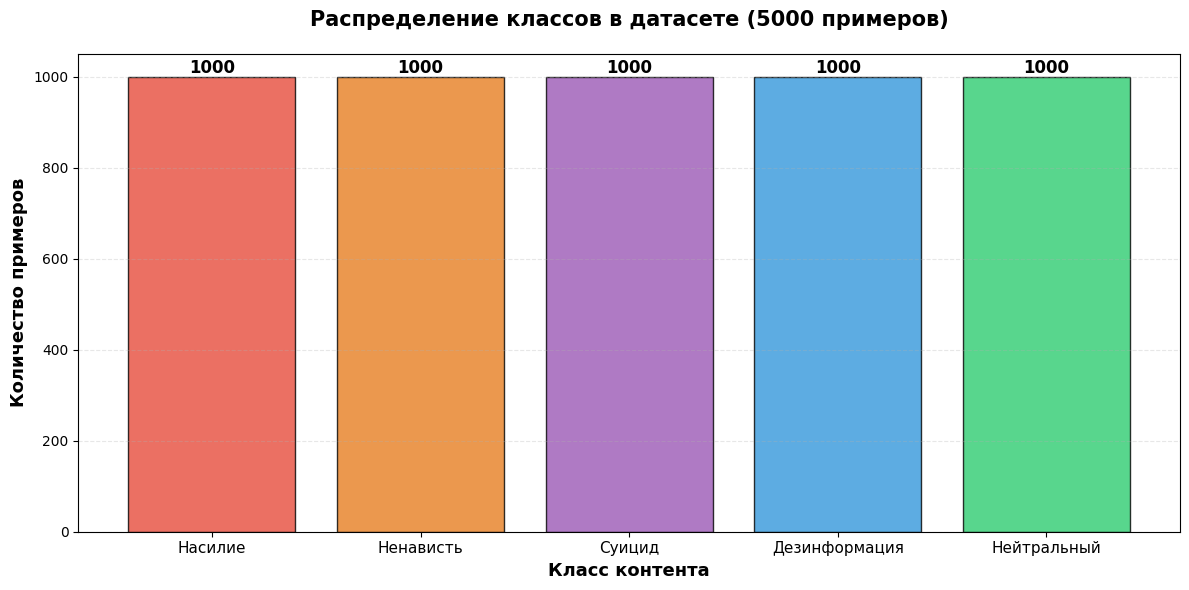


✅ ДАТАСЕТ ГОТОВ К ИСПОЛЬЗОВАНИЮ!

💡 Рекомендации:
   • Датасет содержит 5,000 примеров
   • Количество классов: 5
   • Готов для обучения модели ruBERT

🚀 Следующий шаг: используйте переменную 'df' в коде обучения!

📦 Информация о датасете сохранена в переменной 'dataset_info'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


# Монтируем Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Укажите путь к вашему CSV файлу в Google Drive
# Замените на ваш реальный путь!
CSV_FILE_PATH = '/content/drive/MyDrive/МИМИЗ/dataset_dangerous_content_2.csv'

print("=" * 80)
print("ЗАГРУЗКА ДАТАСЕТА ДЛЯ ВЫЯВЛЕНИЯ ОПАСНОГО КОНТЕНТА")
print("=" * 80)

try:
    # Загружаем датасет из CSV
    df = pd.read_csv(CSV_FILE_PATH, encoding='utf-8')
    print(f"\n✅ Датасет успешно загружен из: {CSV_FILE_PATH}")

    # Проверяем наличие необходимых колонок
    required_columns = ['text', 'label']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"CSV файл должен содержать колонки: {required_columns}")

    # Перемешиваем датасет
    df = shuffle(df, random_state=42).reset_index(drop=True)
    print(f"✅ Датасет перемешан")

except FileNotFoundError:
    print(f"\n❌ ОШИБКА: Файл не найден по пути: {CSV_FILE_PATH}")
    print(f"\n📝 Инструкция:")
    print(f"   1. Создайте CSV файл с двумя колонками: 'text' и 'label'")
    print(f"   2. Загрузите файл в Google Drive")
    print(f"   3. Укажите правильный путь в переменной CSV_FILE_PATH")
    raise
except Exception as e:
    print(f"\n❌ ОШИБКА при загрузке: {str(e)}")
    raise

# Названия классов
label_names = {
    0: 'Насилие',
    1: 'Ненависть',
    2: 'Суицид',
    3: 'Дезинформация',
    4: 'Нейтральный'
}


print(f"\n📊 Общая статистика:")
print(f"   Всего примеров: {len(df):,}")
print(f"   Количество текстов: {len(df['text']):,}")
print(f"   Количество меток: {len(df['label']):,}")
print(f"   Размеры совпадают: {'✅ ДА' if len(df['text']) == len(df['label']) else '❌ НЕТ'}")

# Проверяем наличие пропущенных значений
missing_text = df['text'].isna().sum()
missing_label = df['label'].isna().sum()
print(f"   Пропущенных значений в 'text': {missing_text}")
print(f"   Пропущенных значений в 'label': {missing_label}")

if missing_text > 0 or missing_label > 0:
    print(f"\n⚠️  ВНИМАНИЕ: Обнаружены пропущенные значения! Удаляем их...")
    df = df.dropna(subset=['text', 'label']).reset_index(drop=True)
    print(f"   Осталось примеров: {len(df):,}")

# Проверяем типы меток
unique_labels = sorted(df['label'].unique())
print(f"\n🏷️  Уникальные метки: {unique_labels}")

# Проверяем, что все метки валидны
invalid_labels = [label for label in unique_labels if label not in label_names]
if invalid_labels:
    print(f"\n⚠️  ВНИМАНИЕ: Обнаружены неизвестные метки: {invalid_labels}")
    print(f"   Допустимые метки: {list(label_names.keys())}")

print(f"\n📈 Распределение по классам:")
print("-" * 80)
for label in sorted(df['label'].unique()):
    if label in label_names:
        count = (df['label'] == label).sum()
        percentage = (count / len(df)) * 100
        bar = '█' * int(percentage)
        print(f"   {label} - {label_names[label]:15} : {count:4} ({percentage:5.1f}%) {bar}")

print(f"\n📝 Примеры из каждого класса:")
print("-" * 80)
for label in sorted(df['label'].unique()):
    if label in label_names:
        print(f"\n[{label_names[label].upper()}]")
        samples = df[df['label'] == label].sample(min(3, len(df[df['label'] == label])))
        for idx, row in samples.iterrows():
            text = str(row['text'])[:80]
            print(f"   • {text}{'...' if len(str(row['text'])) > 80 else ''}")


plt.figure(figsize=(12, 6))
counts = df['label'].value_counts().sort_index()
colors = ['#e74c3c', '#e67e22', '#9b59b6', '#3498db', '#2ecc71']

# Используем только те цвета, которые соответствуют существующим меткам
valid_labels = [label for label in range(5) if label in counts.index]
valid_colors = [colors[label] for label in valid_labels]

bars = plt.bar(range(len(valid_labels)),
               [counts[label] for label in valid_labels],
               color=valid_colors,
               alpha=0.8,
               edgecolor='black')

plt.xlabel('Класс контента', fontsize=13, fontweight='bold')
plt.ylabel('Количество примеров', fontsize=13, fontweight='bold')
plt.title(f'Распределение классов в датасете ({len(df)} примеров)',
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(valid_labels)),
           [label_names[i] for i in valid_labels],
           rotation=0, fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


print("\n" + "=" * 80)
print("✅ ДАТАСЕТ ГОТОВ К ИСПОЛЬЗОВАНИЮ!")
print("=" * 80)
print(f"\n💡 Рекомендации:")
print(f"   • Датасет содержит {len(df):,} примеров")
print(f"   • Количество классов: {len(df['label'].unique())}")
print(f"   • Готов для обучения модели ruBERT")
if len(df) < 5000:
    print(f"   • ⚠️  Для продакшена рекомендуется увеличить до 5000-10000 примеров")
print(f"\n🚀 Следующий шаг: используйте переменную 'df' в коде обучения!")
print("=" * 80)

# Сохраняем информацию о датасете
dataset_info = {
    'total_samples': len(df),
    'num_classes': len(df['label'].unique()),
    'class_distribution': df['label'].value_counts().to_dict(),
    'csv_path': CSV_FILE_PATH
}

print(f"\n📦 Информация о датасете сохранена в переменной 'dataset_info'")

In [ ]:
# Разделение на train/val/test (70/15/15)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

# Загрузка токенизатора RuBERT
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Функция токенизации
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=256  # Можно увеличить до 256 или 512 при необходимости
    )

# Преобразование в Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['text', 'label']])

# Токенизация
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Установка формата для PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

print("Токенизация завершена!")

Train: 3500 | Val: 750 | Test: 750


Map:   0%|          | 0/3500 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Токенизация завершена!


In [ ]:
num_labels = 5  # 5 классов контента

# Загрузка модели
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="single_label_classification"
)

model.to(device)
print(f"Модель загружена на {device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Модель загружена на cuda


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Вычисление метрик
    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted
    }


In [ ]:
import torch
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',                    # Папка для сохранения
    num_train_epochs=5,                        # Количество эпох
    per_device_train_batch_size=16,            # Размер batch для обучения
    per_device_eval_batch_size=32,             # Размер batch для валидации
    learning_rate=2e-5,                        # Learning rate
    weight_decay=0.01,                         # Weight decay
    warmup_steps=500,                          # Warmup шаги

    # Логирование и сохранение
    logging_dir='./logs',
    logging_steps=50,
    save_strategy='epoch',
    eval_strategy='epoch',                     # ✅ ИЗМЕНЕНО: было evaluation_strategy

    # Early stopping
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    greater_is_better=True,

    # Прочее
    save_total_limit=2,                        # Сохранять только 2 лучшие модели
    report_to='none',                          # Отключить интеграции (wandb и т.д.)
    fp16=torch.cuda.is_available(),            # Использовать смешанную точность на GPU
)

print("✅ TrainingArguments успешно созданы!")
print(f"\n📊 Основные параметры:")
print(f"   Эпох: {training_args.num_train_epochs}")
print(f"   Batch size (train): {training_args.per_device_train_batch_size}")
print(f"   Batch size (eval): {training_args.per_device_eval_batch_size}")
print(f"   Learning rate: {training_args.learning_rate}")
print(f"   Eval strategy: {training_args.eval_strategy}")
print(f"   FP16: {training_args.fp16}")

✅ TrainingArguments успешно созданы!

📊 Основные параметры:
   Эпох: 5
   Batch size (train): 16
   Batch size (eval): 32
   Learning rate: 2e-05
   Eval strategy: IntervalStrategy.EPOCH
   FP16: True


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ЗАПУСК ОБУЧЕНИЯ
print("Начало обучения...")
trainer.train()

print("\n✅ Обучение завершено!")

Начало обучения...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted
1,0.705100,0.371913,0.902667,0.902775,0.902775
2,0.171200,0.258953,0.928000,0.926769,0.926769
3,0.080600,0.258014,0.941333,0.941138,0.941138
4,0.035700,0.229611,0.958667,0.958685,0.958685
5,0.015700,0.222298,0.958667,0.958735,0.958735



✅ Обучение завершено!



🎯 Точность на тестовой выборке: 0.9560 (95.60%)

Детальный отчет по классам:
               precision    recall  f1-score   support

      Насилие     0.9673    0.9867    0.9769       150
    Ненависть     0.9733    0.9733    0.9733       150
       Суицид     0.9272    0.9333    0.9302       150
Дезинформация     0.9645    0.9067    0.9347       150
  Нейтральный     0.9484    0.9800    0.9639       150

     accuracy                         0.9560       750
    macro avg     0.9561    0.9560    0.9558       750
 weighted avg     0.9561    0.9560    0.9558       750



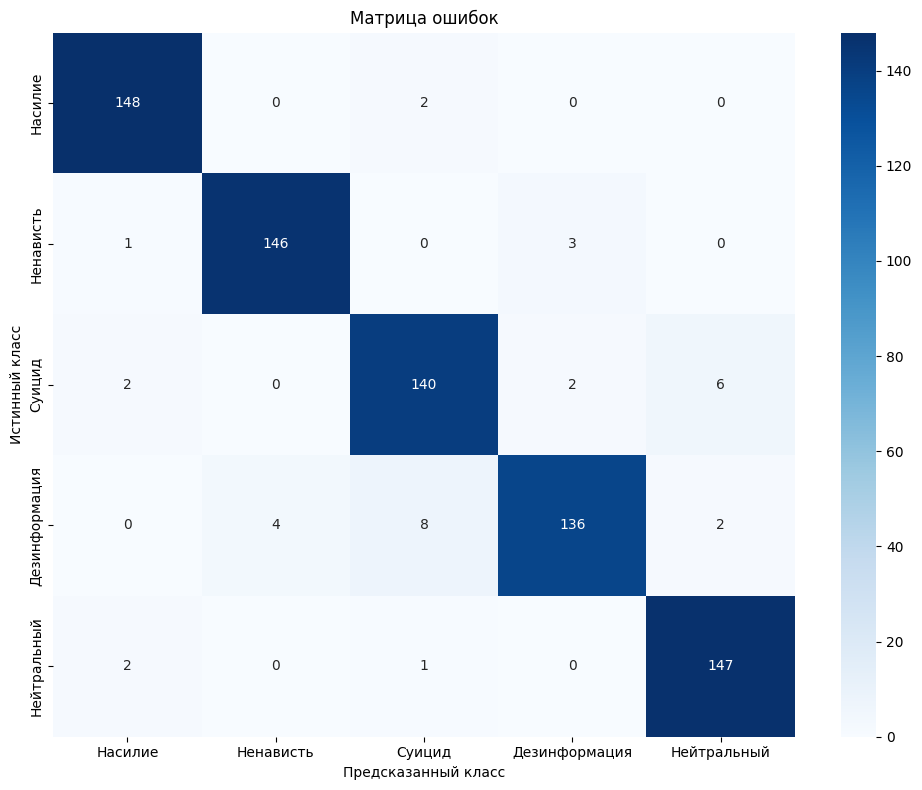

In [ ]:
# Предсказания на тестовой выборке
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids  # Уже numpy массив

# Общая точность
test_accuracy = accuracy_score(true_labels, pred_labels)
print(f"\n🎯 Точность на тестовой выборке: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Детальный отчет
print("\nДетальный отчет по классам:")
print(classification_report(
    true_labels,
    pred_labels,
    target_names=[label_names[i] for i in range(5)],
    digits=4
))

# Матрица ошибок
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[label_names[i] for i in range(5)],
    yticklabels=[label_names[i] for i in range(5)]
)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.tight_layout()
plt.show()

In [ ]:
# Сохранение локально в Colab
model_save_path = '/content/drive/MyDrive/МИМИЗ/rubert_toxic_classifier_v3'
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"✅ Модель сохранена в {model_save_path}")

# Сохранение в Google Drive (раскомментируйте при необходимости)

from google.colab import drive
drive.mount('/content/drive')

import shutil
drive_path = '/content/drive/MyDrive/МИМИЗ (Подоплелова)/rubert_toxic_model_v3'
shutil.copytree(model_save_path, drive_path, dirs_exist_ok=True)
print(f"✅ Модель скопирована в Google Drive: {drive_path}")


# Создание архива для скачивания
!zip -r rubert_toxic_classifier.zip ./rubert_toxic_classifier
print("✅ Создан архив rubert_toxic_classifier.zip для скачивания")

✅ Модель сохранена в /content/drive/MyDrive/МИМИЗ (Подоплелова)/rubert_toxic_classifier_v3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Модель скопирована в Google Drive: /content/drive/MyDrive/МИМИЗ (Подоплелова)/rubert_toxic_model_v3
	zip warning: name not matched: ./rubert_toxic_classifier

zip error: Nothing to do! (try: zip -r rubert_toxic_classifier.zip . -i ./rubert_toxic_classifier)
✅ Создан архив rubert_toxic_classifier.zip для скачивания
